In [1]:
import colour_scheme as cs
import importlib
importlib.reload(cs)
import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
from pathlib import Path

path_fig = ''
path_data = ''

In [3]:
adata = sc.read_h5ad(Path(path_data)/'exp1_processed_5_1.h5ad')
adata = adata[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])].copy()
adata

AnnData object with n_obs × n_vars = 209902 × 4347
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'lib', 'original_name', 'condition\xa0_x', 'condition\xa0_y', 'condition_name_full', 'cell_line_1', 'cell_line_2', 'batch', 'medium', 'morphogen', 'morphogen_full', 'Batch_Medium', 'medium_morphogen', 'leiden', 'cell_class_v1', 'region_v1', 'fullname_v1', 'cell_line_pool', 'line_medium', 'iPSC_prob_max', 'iPSC_best_singlet', 'ESC_prob_max', 'ESC_best_singlet', 'cell_line', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.1', 'best_class', 'best_score_class', 'best_NT', 'best_score_NT', 'best_region', 'fullname_v3', 'doublet_score', 'predicted_doublet', 'fullname_v4', 'fullname_v5'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'RNA_snn_res.1_colors', 'batch_colors', 'best_NT_colors', 'best_class_colors', 'bes

In [4]:
adata.obs['line_morphogen_batch'] = adata.obs.medium_morphogen.astype(str) + '_' + adata.obs.cell_line.astype(str) + '_' + adata.obs.batch.astype(str) 
adata

AnnData object with n_obs × n_vars = 209902 × 4347
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'lib', 'original_name', 'condition\xa0_x', 'condition\xa0_y', 'condition_name_full', 'cell_line_1', 'cell_line_2', 'batch', 'medium', 'morphogen', 'morphogen_full', 'Batch_Medium', 'medium_morphogen', 'leiden', 'cell_class_v1', 'region_v1', 'fullname_v1', 'cell_line_pool', 'line_medium', 'iPSC_prob_max', 'iPSC_best_singlet', 'ESC_prob_max', 'ESC_best_singlet', 'cell_line', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.1', 'best_class', 'best_score_class', 'best_NT', 'best_score_NT', 'best_region', 'fullname_v3', 'doublet_score', 'predicted_doublet', 'fullname_v4', 'fullname_v5', 'line_morphogen_batch'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'RNA_snn_res.1_colors', 'batch_colors', 'best_NT_colors', '

In [3]:
cell_types_order = ['Neuroectoderm/Neuroepithelium',
                    'Telencephalic Progenitors',
                     'Retinal Progenitors',
                     'Hindbrain Progenitors',
                    'Hindbrain_NPM?',
                     'Hypothalamic Progenitors',
                     'Spinal Cord Progenitors',
                    'Midbrain Progenitors',
                     'Cortical Hem/Diencephalon',
                      'Floor Plate',
                     'CNS Neurons',
                    'PNS Neurons',          
                     'Non-neurectodermal tissues',
                       'Neural Crest']

cond_order =  ['Ctrl', 'SHH_A', 'SHH_E', 'RA_A', 'RA_E', 'CHIR_A', 'CHIR_E', 'FGF8_late_A', 
               'FGF8_late_E', 'CHIR_tA', 'CHIR_tC', 'CHIR_tE' ]


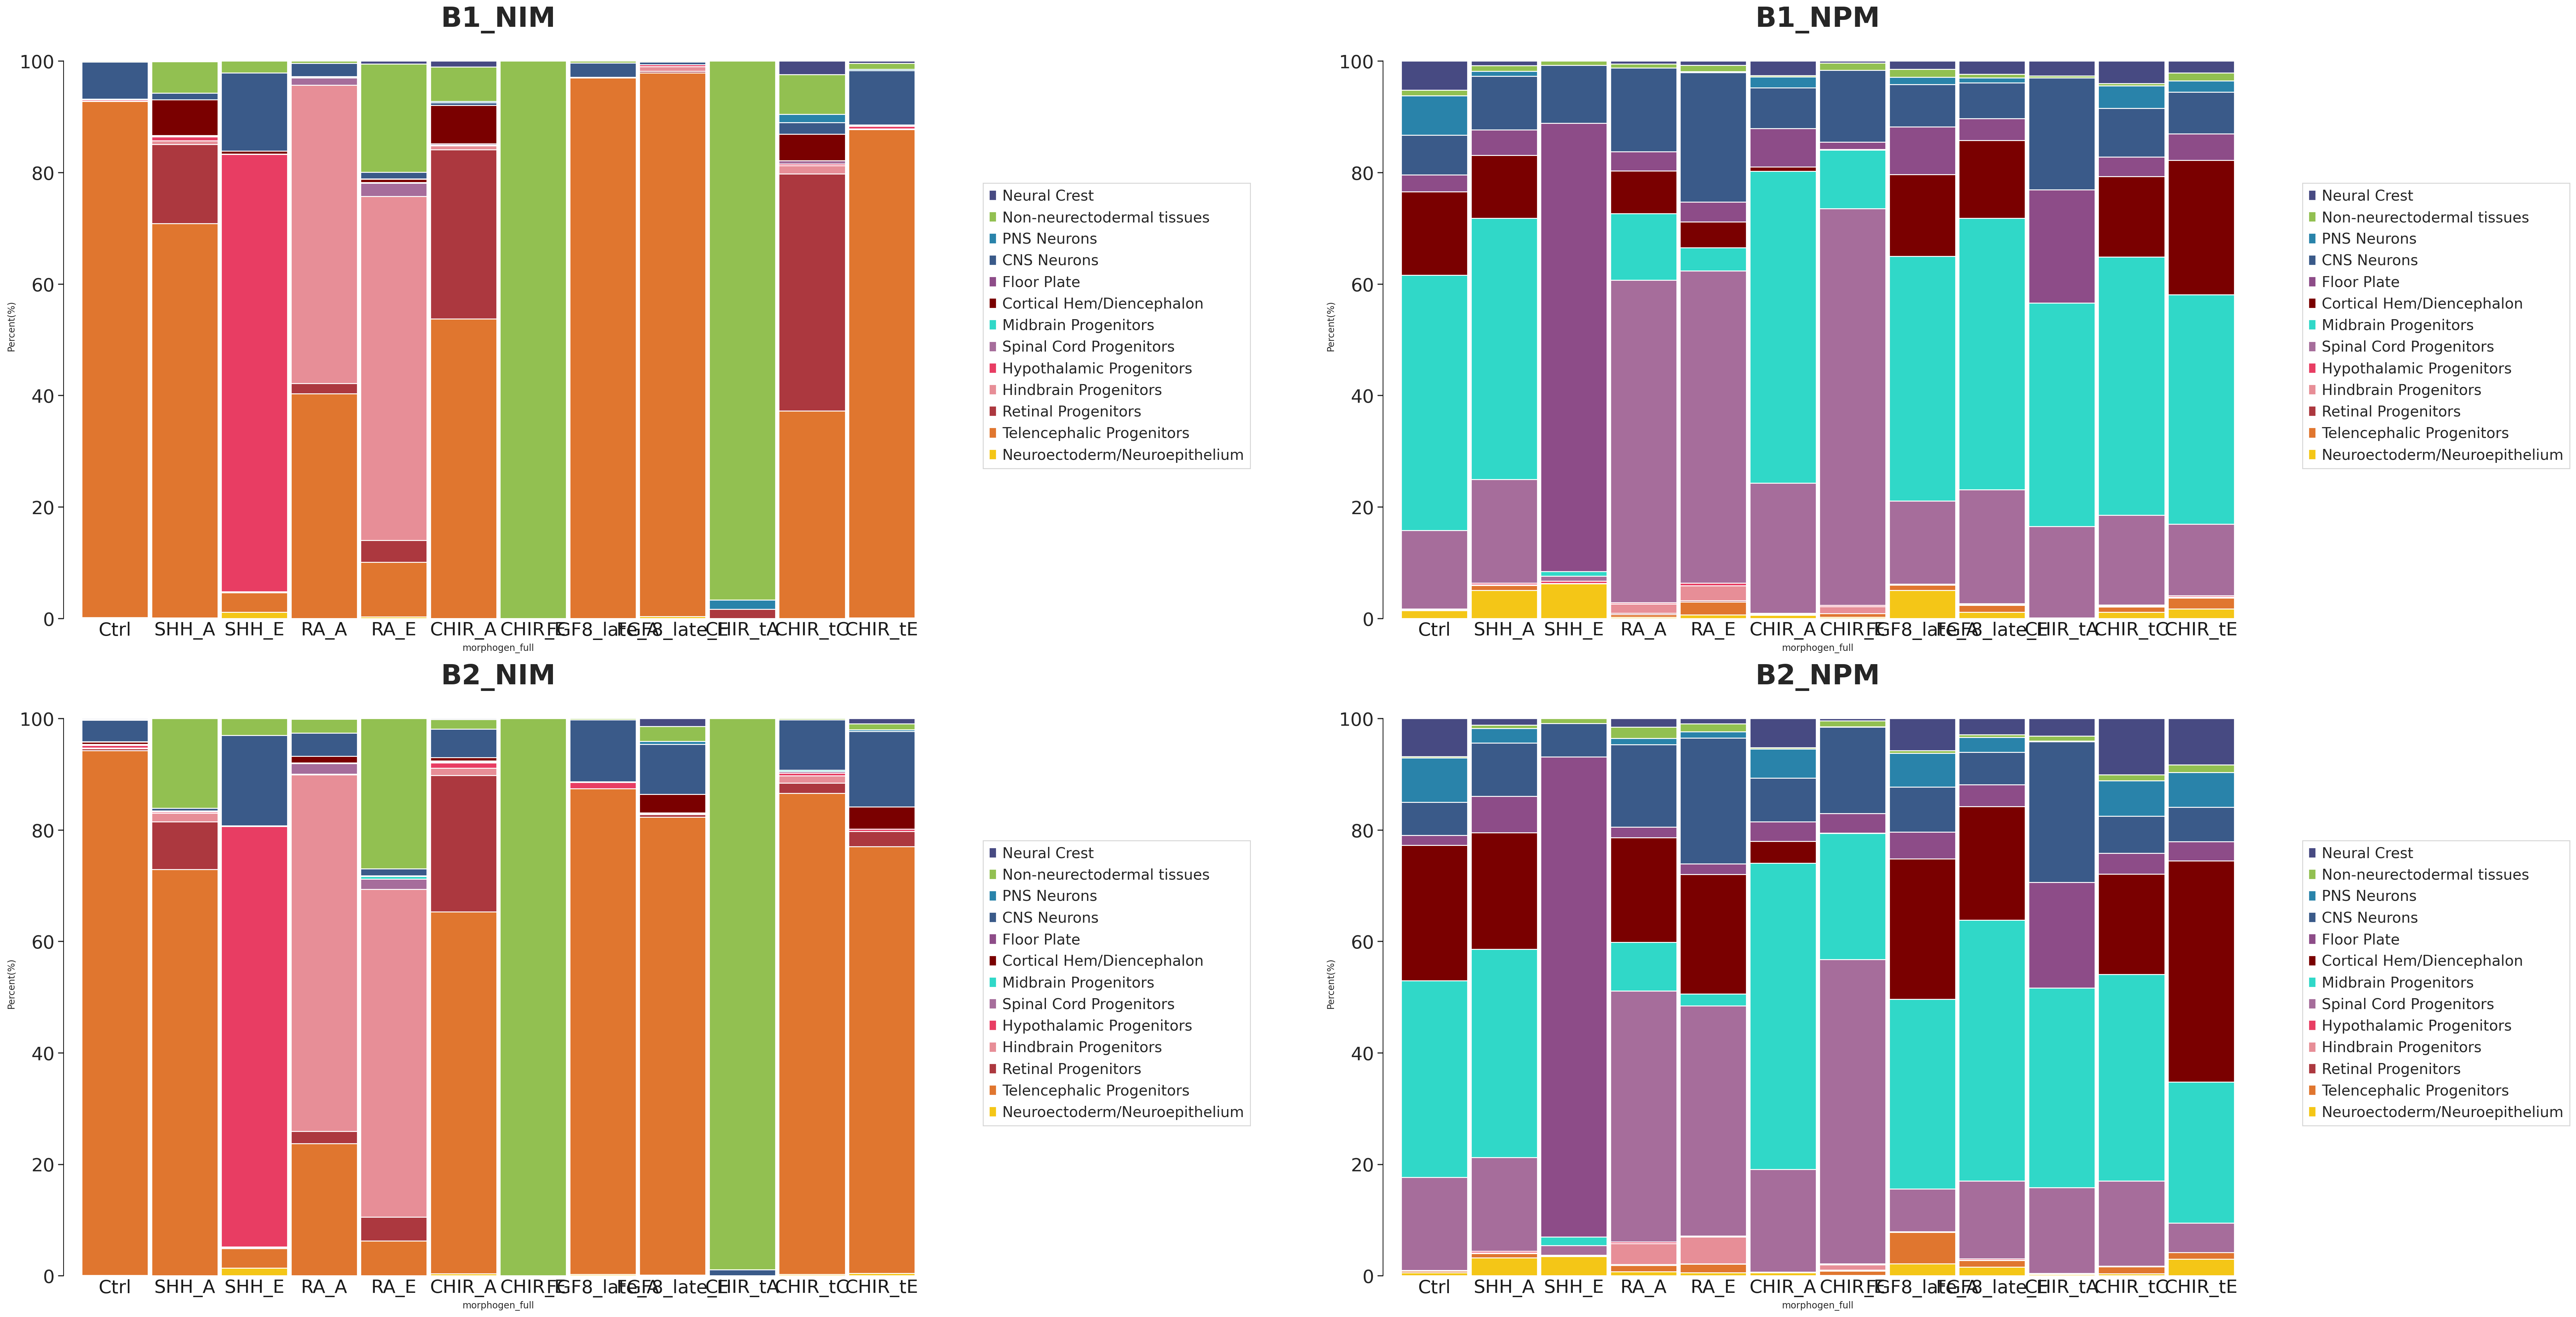

In [29]:
celltable = adata.obs[adata.obs.cell_line == 'WTC']
conditions = ['B1_NIM', 'B1_NPM', 'B2_NIM', 'B2_NPM']


cs.plot_stacked_barplot(celltable, conditions, condition_column='Batch_Medium', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'WTC_batched_fn_v5.pdf')

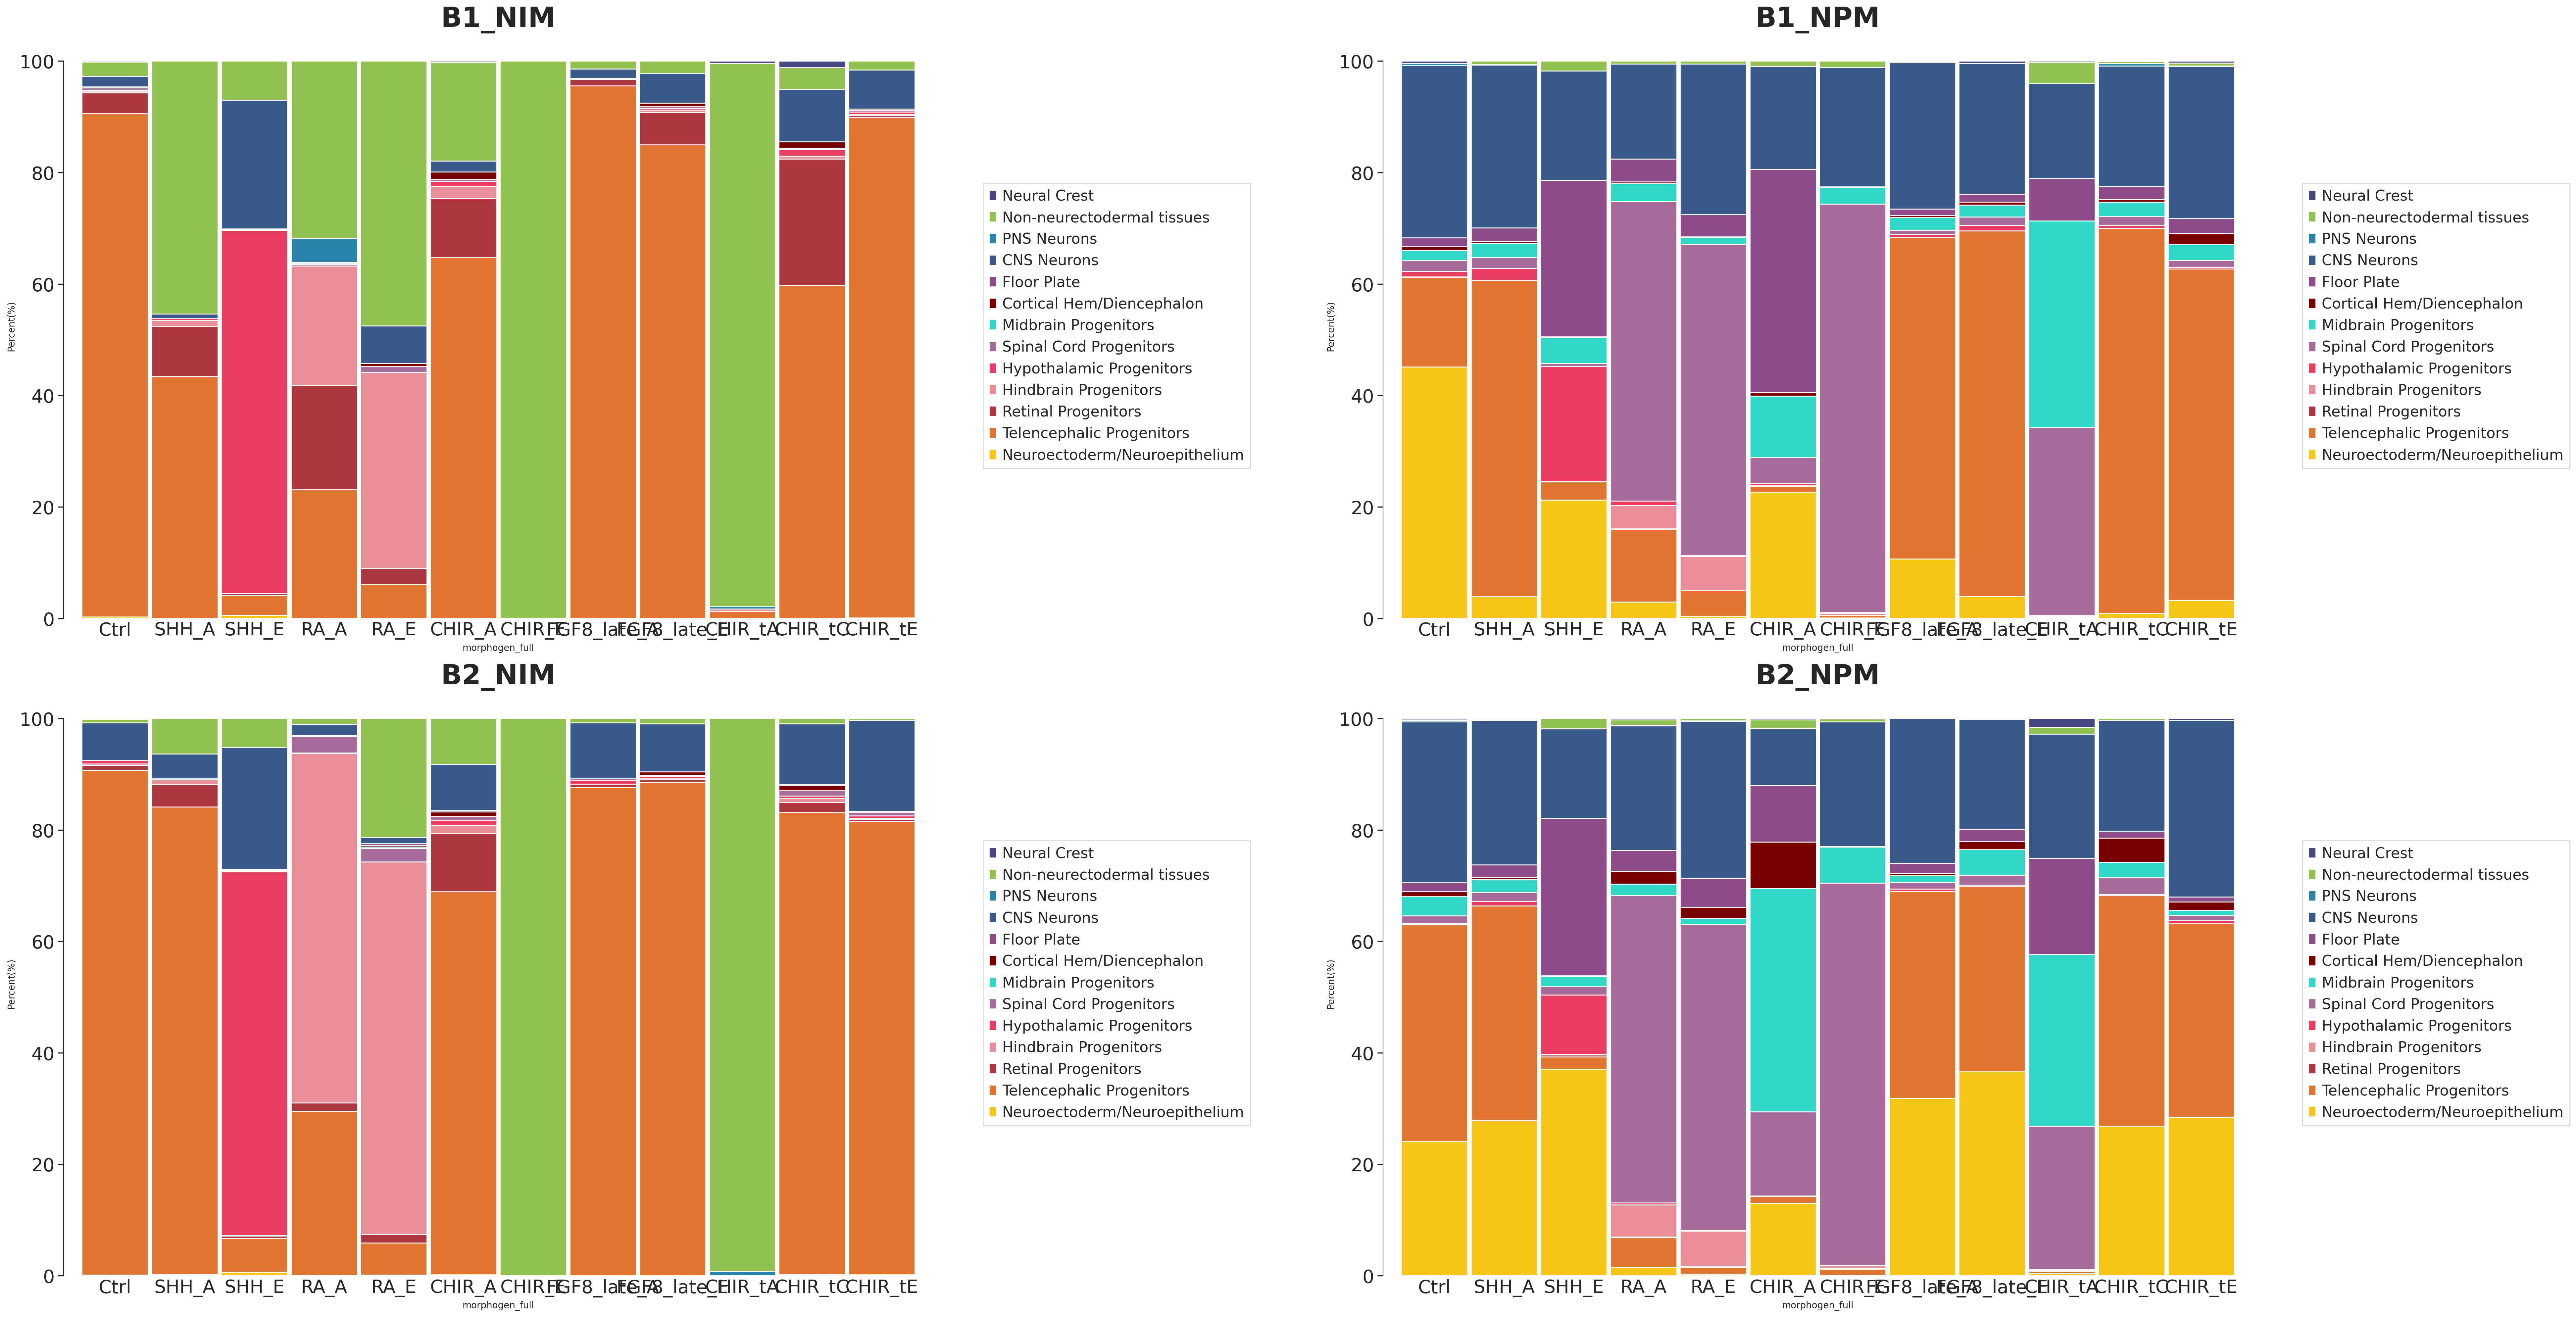

In [30]:
celltable = adata.obs[adata.obs.cell_line == 'WIBJ2']
conditions = ['B1_NIM', 'B1_NPM', 'B2_NIM', 'B2_NPM']
cs.plot_stacked_barplot(celltable, conditions, condition_column='Batch_Medium', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'WIBJ2_batched_fn_v5.pdf')

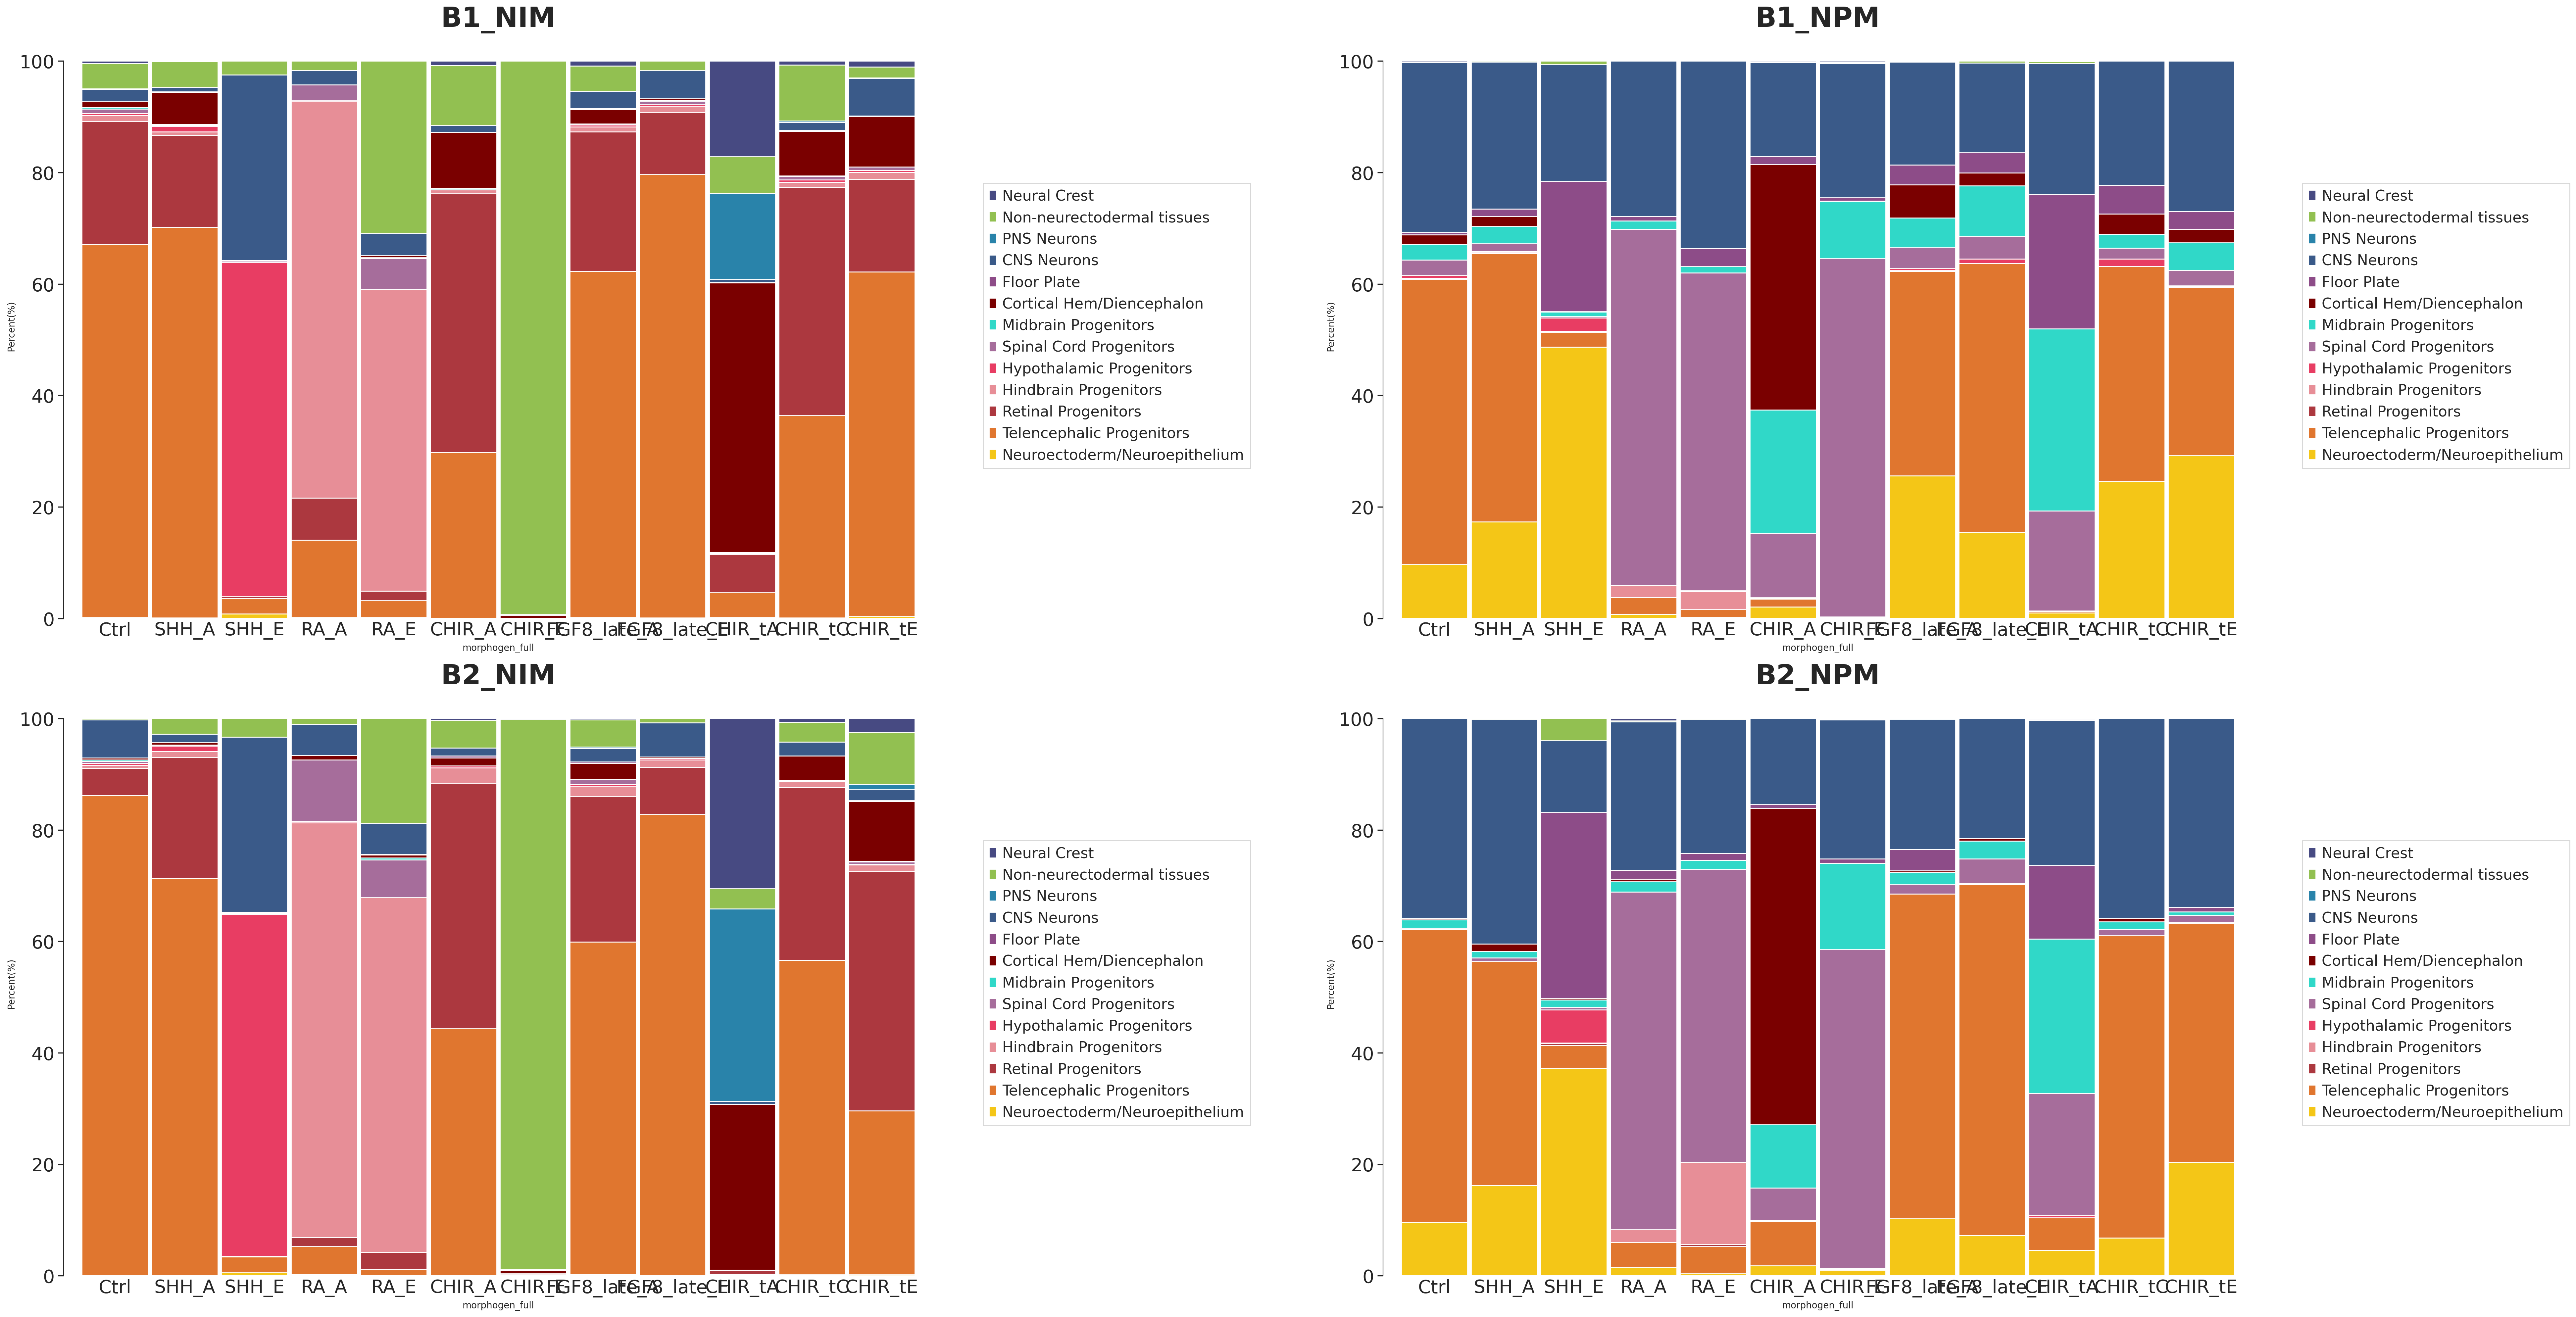

In [31]:
celltable = adata.obs[adata.obs.cell_line == 'H9']

cs.plot_stacked_barplot(celltable, conditions, condition_column='Batch_Medium', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'H9_batched_fn_v5.pdf')

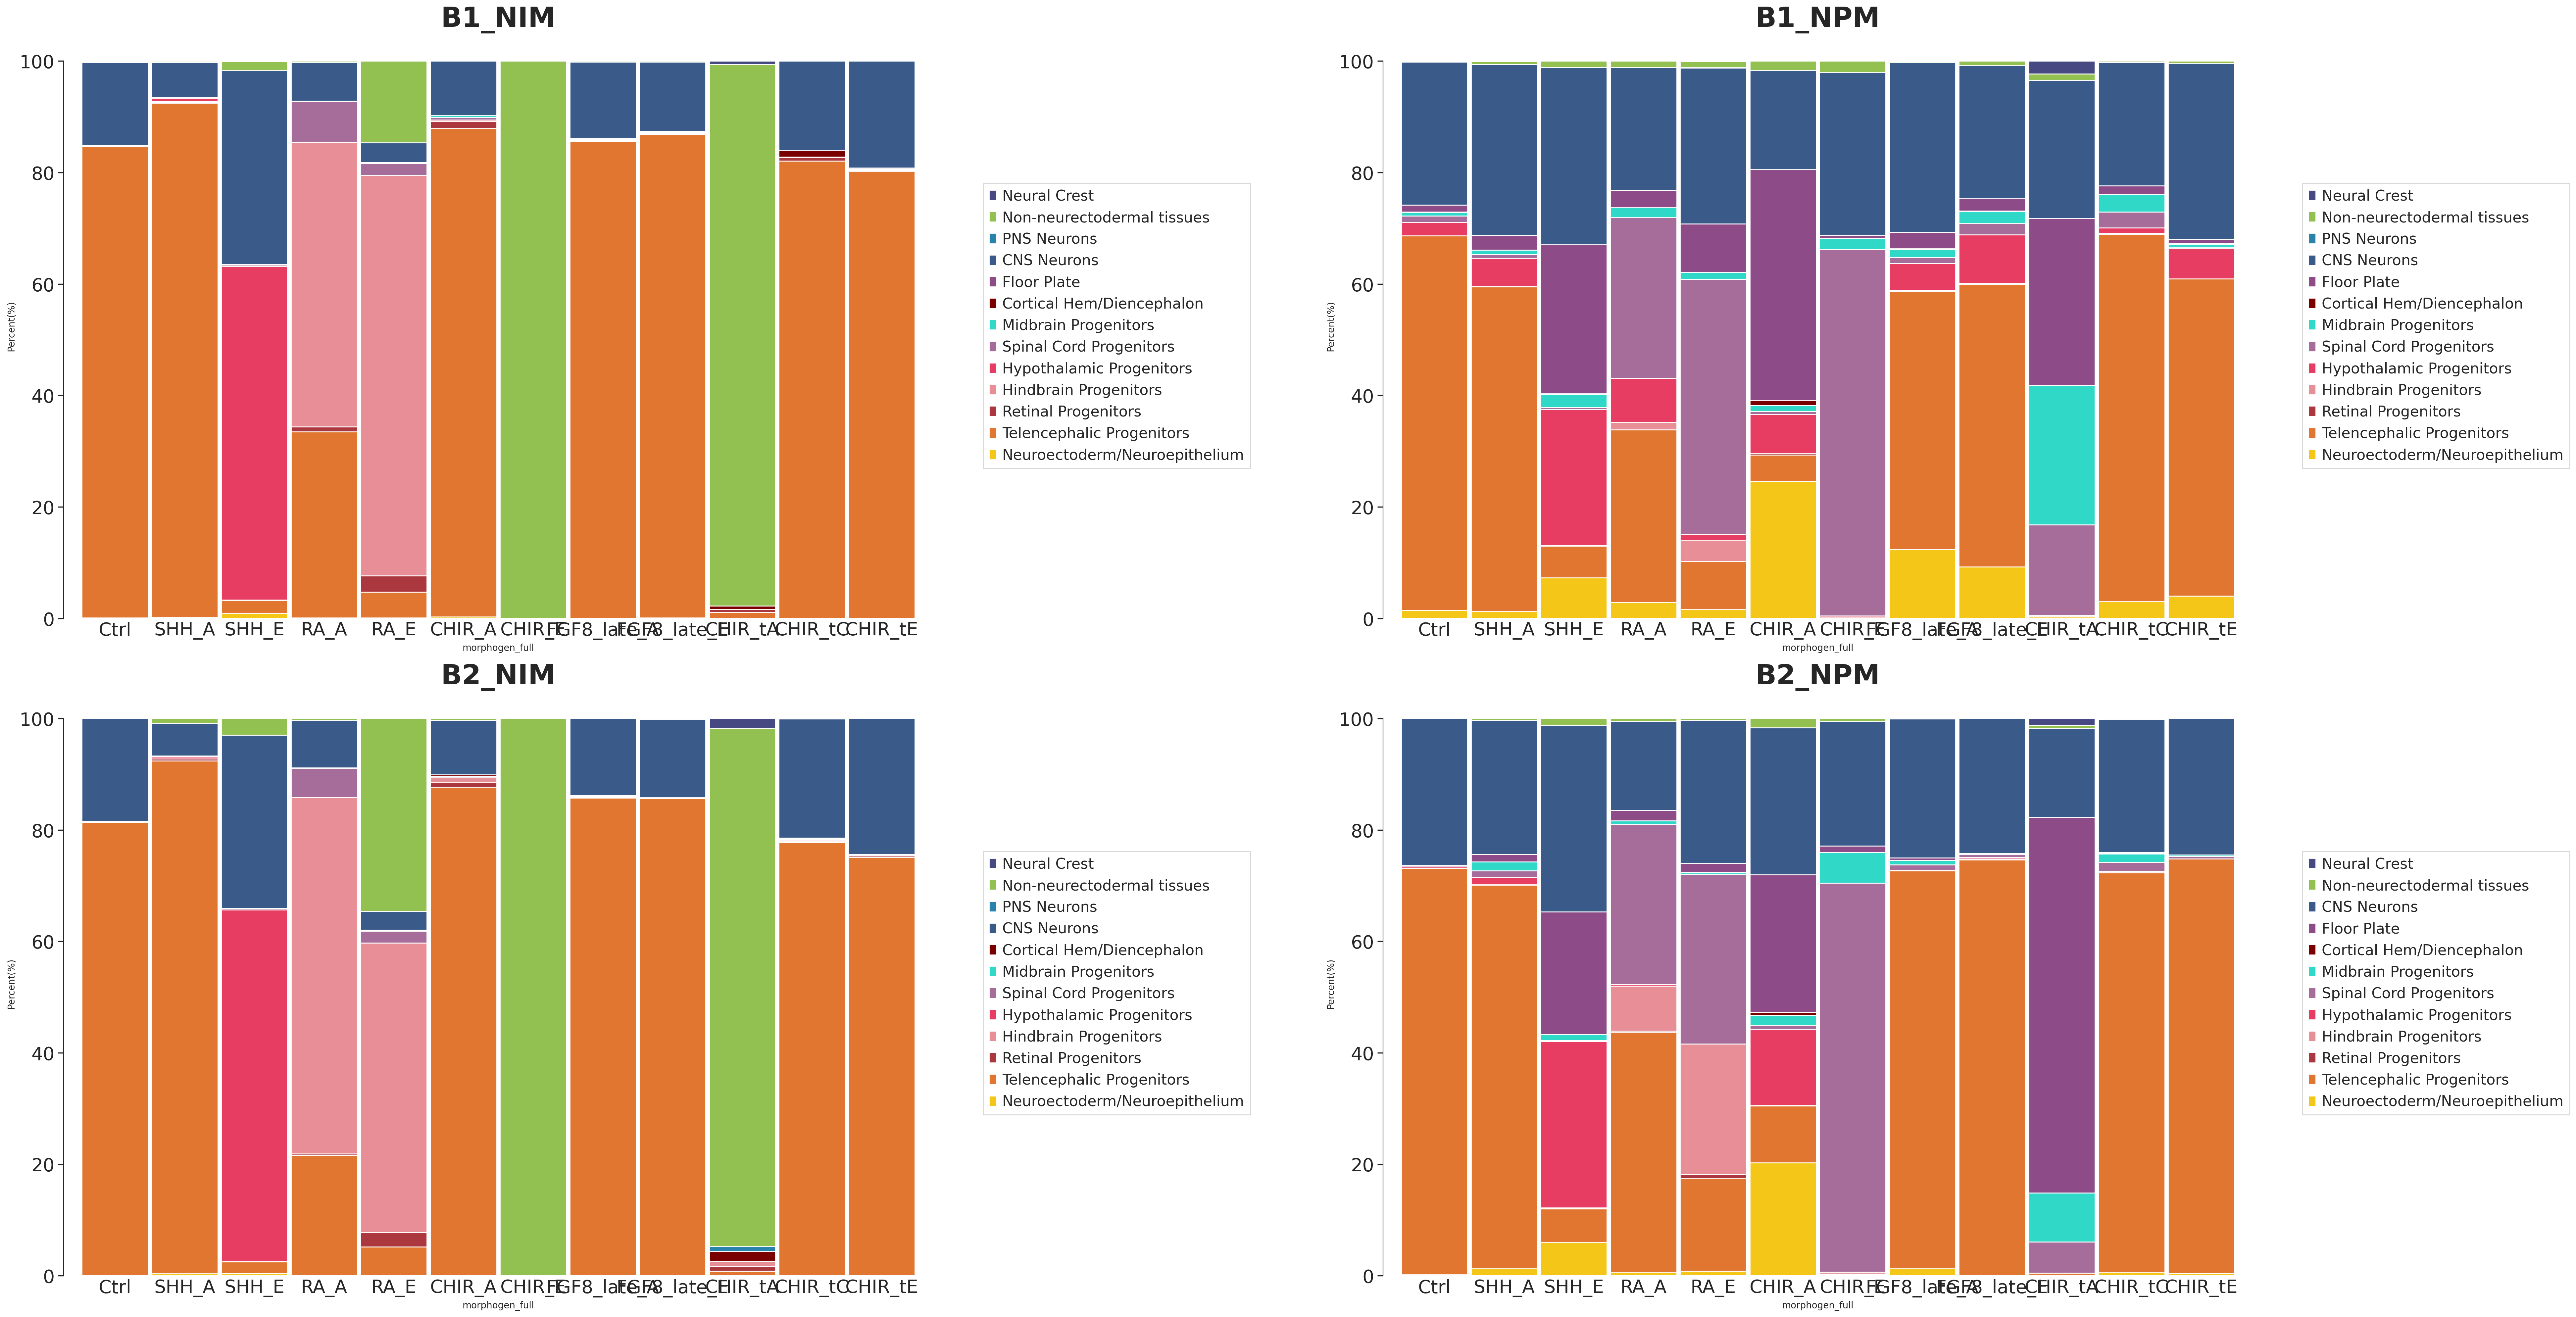

In [32]:
celltable = adata.obs[adata.obs.cell_line == 'H1']

cs.plot_stacked_barplot(celltable, conditions, condition_column='Batch_Medium', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'H1_batched_fn_v5.pdf')

In [33]:
adata.obs['cell_line_medium'] = adata.obs.cell_line.astype(str) + '_' + adata.obs.medium.astype(str)
adata.obs.cell_line_medium.unique()

array(['H1_NIM', 'ESC_NIM', 'H9_NIM', 'WTC_NIM', 'WIBJ2_NIM', 'iPSC_NIM',
       'H1_NPM', 'H9_NPM', 'ESC_NPM', 'WTC_NPM', 'WIBJ2_NPM', 'iPSC_NPM'],
      dtype=object)

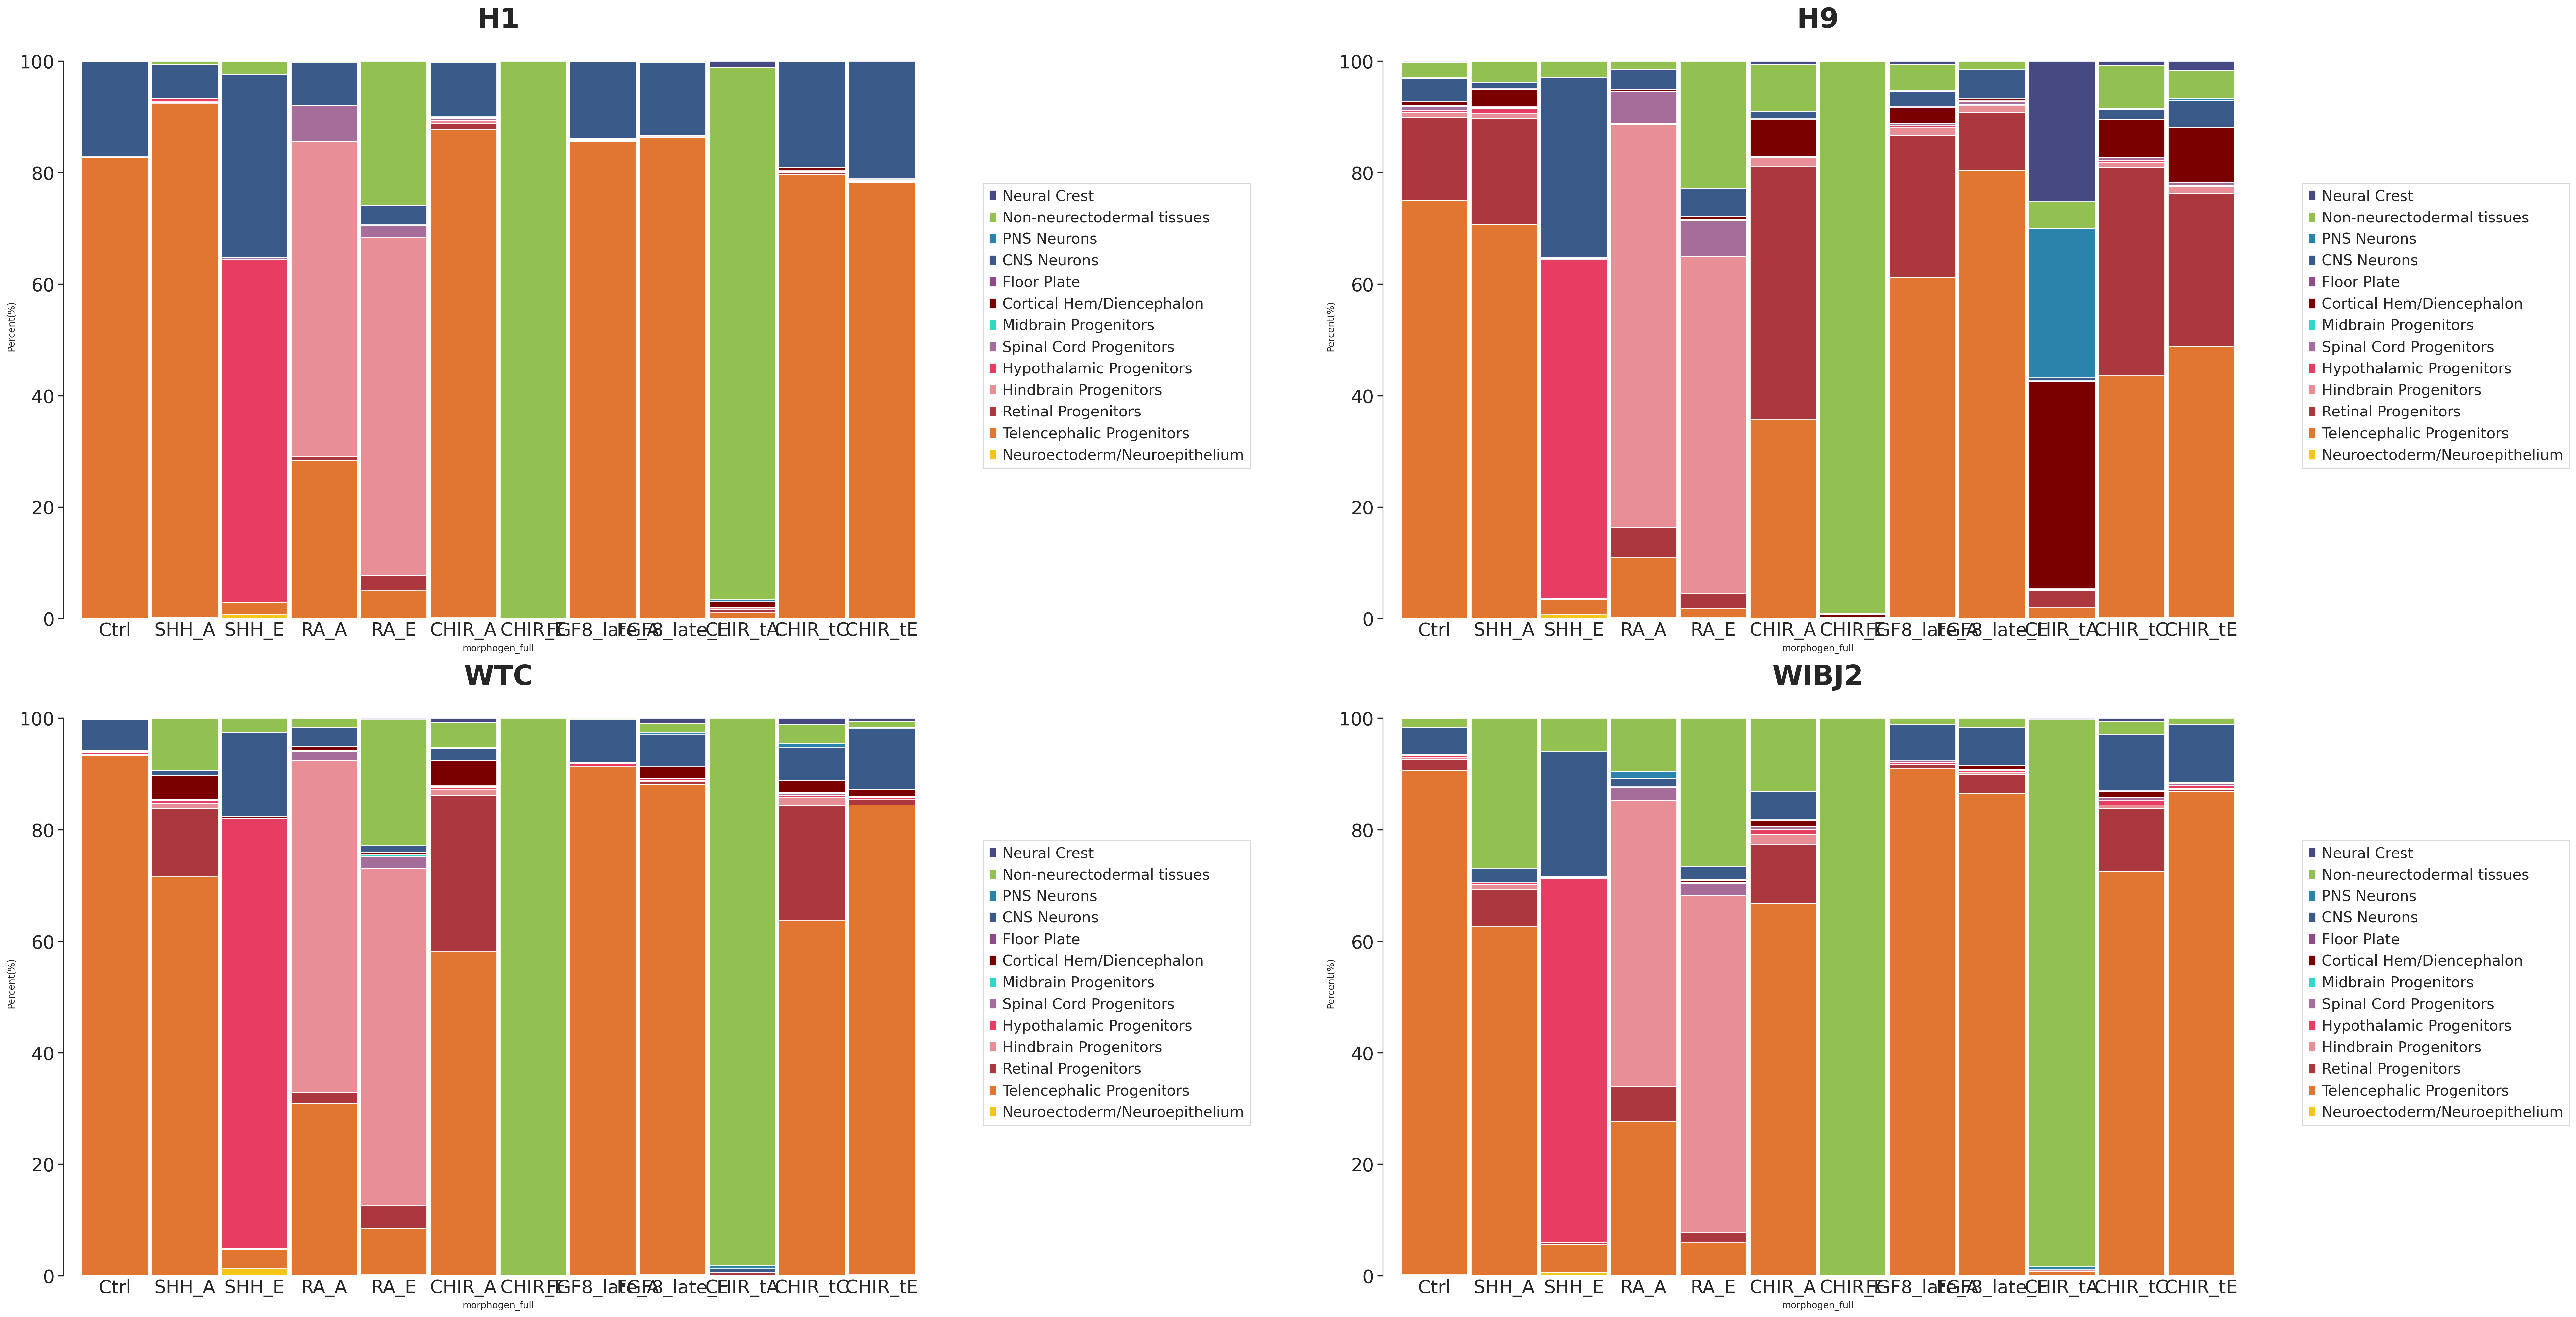

In [34]:
celltable = adata.obs[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])]
celltable = celltable[celltable.medium=='NIM']

conditions = ['H1', 'H9','WTC', 'WIBJ2']

cs.plot_stacked_barplot(celltable, conditions, condition_column='cell_line', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'NIM_medium_fn_v5.pdf')

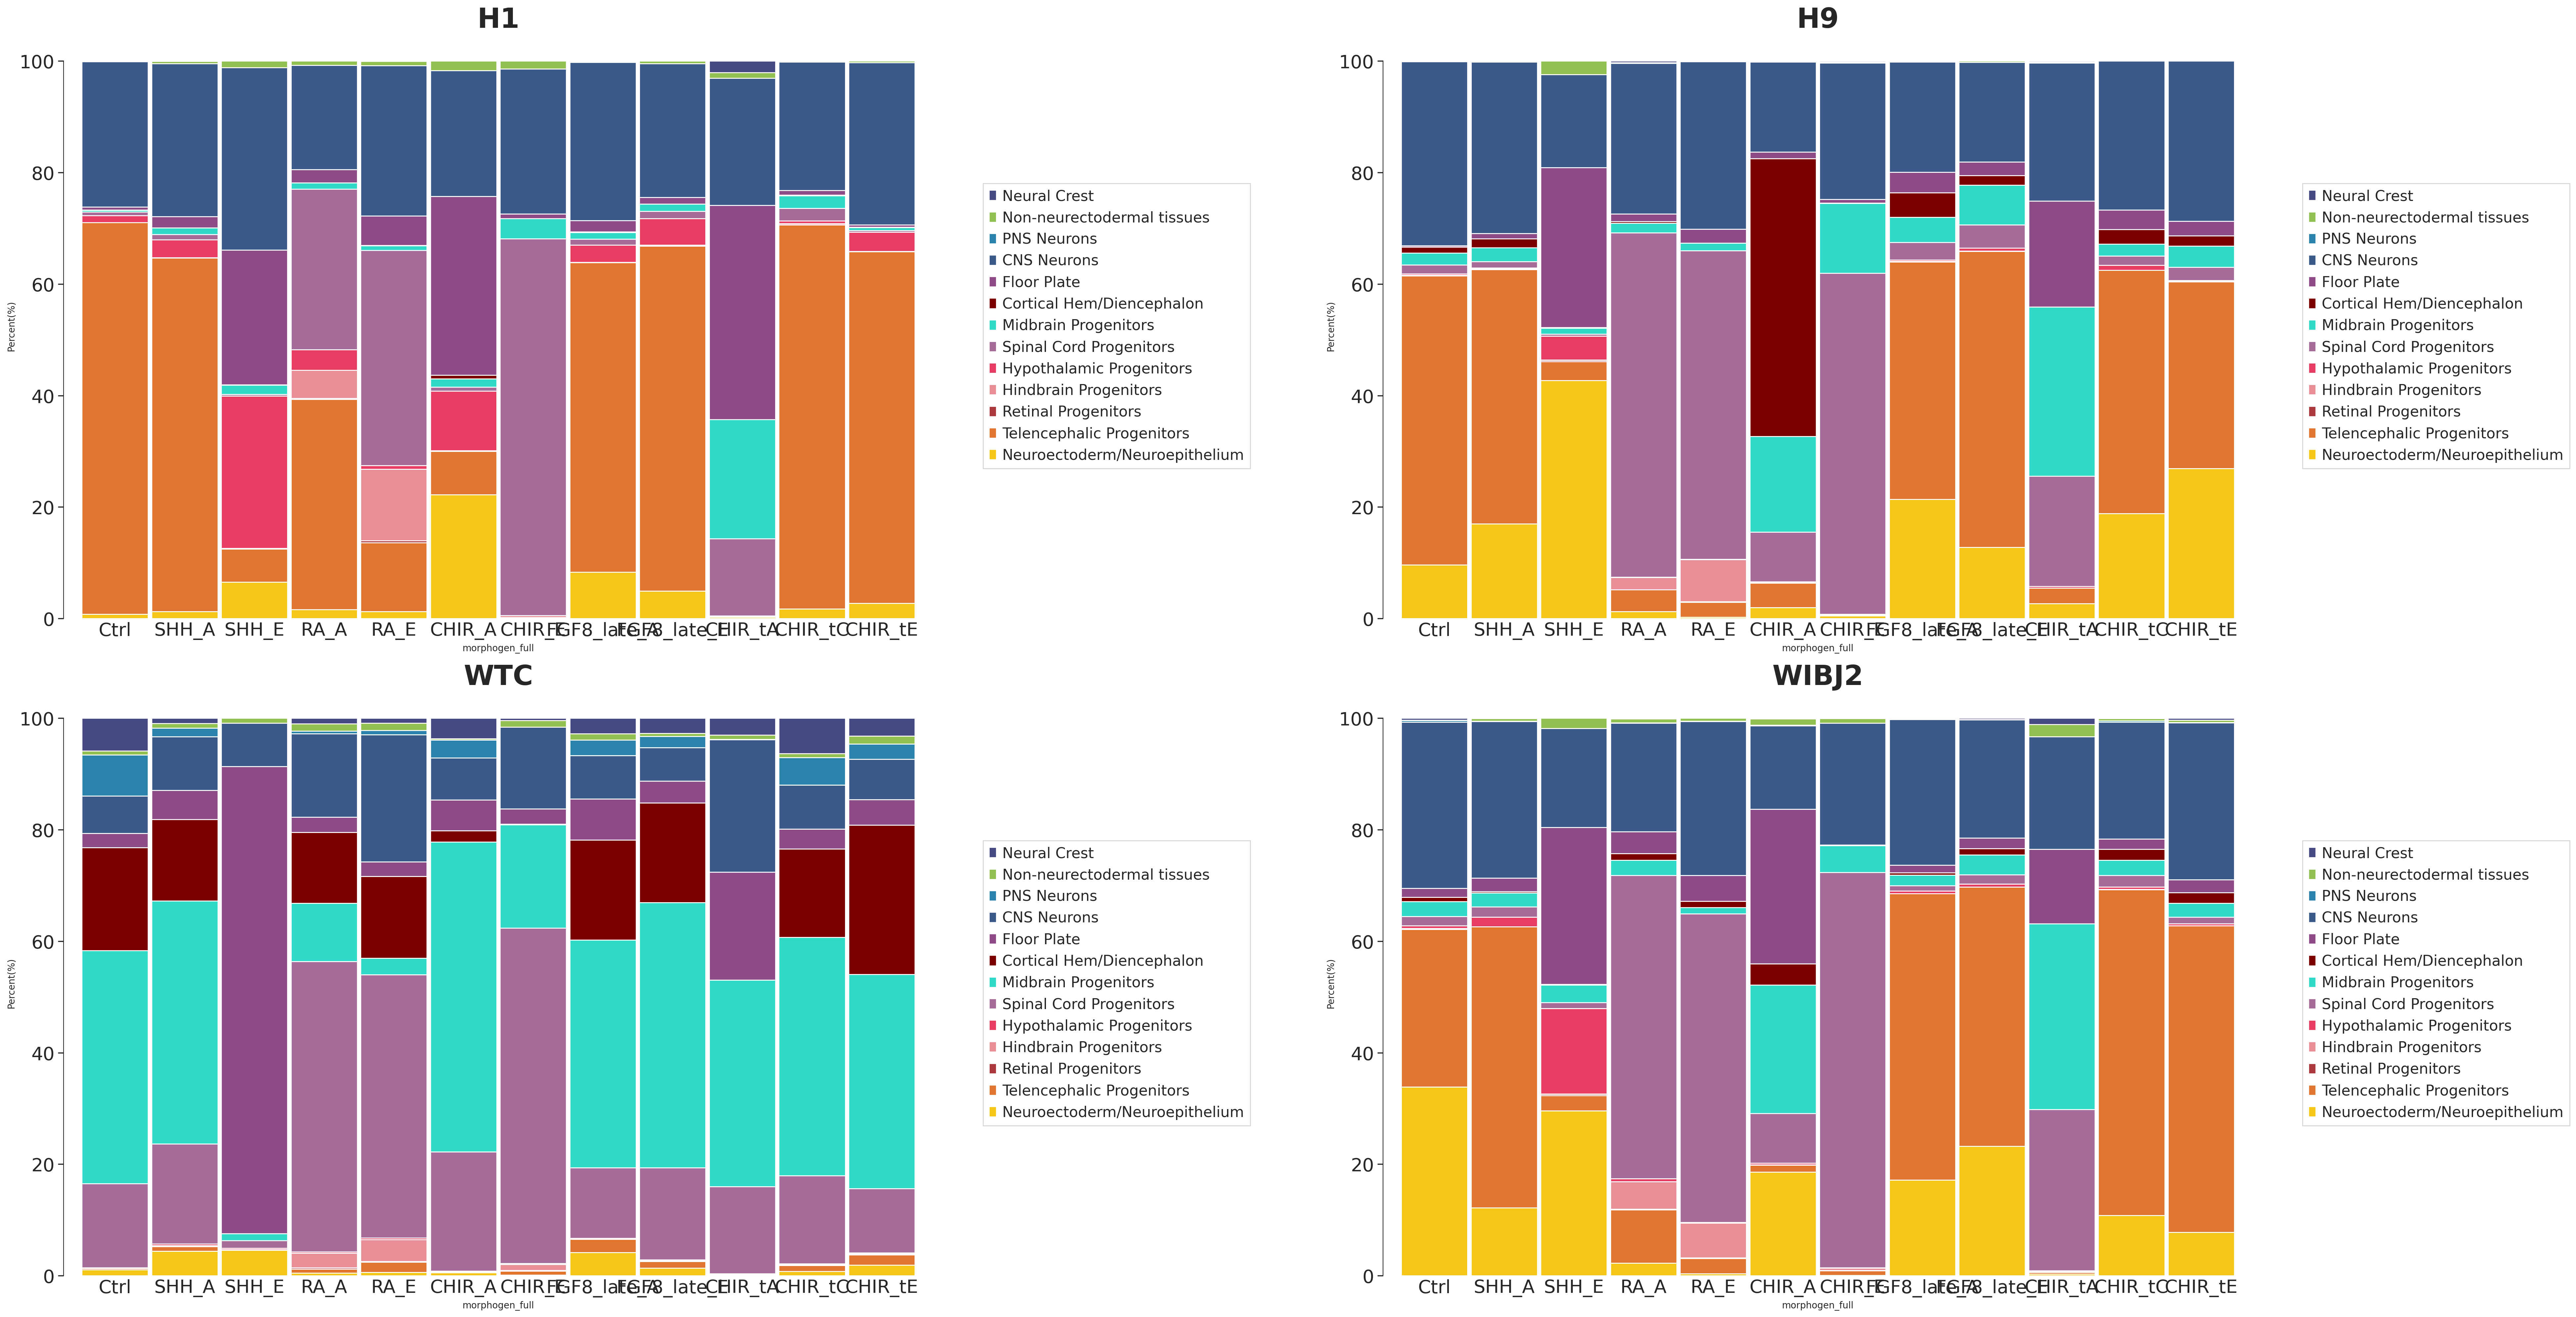

In [35]:
celltable = adata.obs[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])]
celltable = celltable[celltable.medium=='NPM']

cs.plot_stacked_barplot(celltable, conditions, condition_column='cell_line', 
                     column_celltype = 'fullname_v5', 
                        cell_types_order=cell_types_order, cond_order=cond_order,
                        palette=cs.cell_type_colors,
                       fig_name = path_fig+'NPM_medium_fn_v5.pdf')

# Reproducibility

## Batch

In [120]:
def plot_KLD(celltable, title='', filepath = None, mode='bar', ylim=True):
    # mode: "bar" or "violin"
    metadf = celltable[['medium_morphogen', 'line_morphogen_batch']].drop_duplicates()
    dfc = pd.crosstab(celltable['line_morphogen_batch'], celltable.fullname_v5, normalize='index').mul(100).round(100)
    dfc['line_morphogen_batch'] = dfc.index.copy()
    dfc.index.name = None
    
    dfc = pd.merge(dfc, metadf, how = 'left', on = 'line_morphogen_batch')
    import  itertools 
    from scipy.stats import entropy
    result = pd.DataFrame()
    for cond in dfc.medium_morphogen.unique():
        sampledf = dfc[dfc.medium_morphogen == cond].copy()
        sampledf = sampledf.drop(['line_morphogen_batch', 'medium_morphogen'],axis=1)
        sampledf = sampledf.reset_index(drop=True)
        sampledf = sampledf.T
    
        if sampledf.shape[1] >1:
            combin = list(itertools.combinations(sampledf.columns.tolist(), 2))
            reslist = [entropy(sampledf.loc[:,c].iloc[:,0]+0.00000001, sampledf.loc[:,c].iloc[:,1]+0.00000001 ) for c in combin]  #+ small number to fill 0
            resdf = pd.DataFrame({'medium_morphogen': [cond for i in range(len(reslist))], 'KLD' :reslist})
            result = pd.concat([result, resdf], axis =0)


    sns.set(rc={'figure.figsize':(15,4)})
    sns.set_style("whitegrid", { "grid.linestyle": ":"})
    my_order = result.groupby(by=["medium_morphogen"])["KLD"].median().sort_values().iloc[::-1].index
    
    if mode == 'bar':
        plot = sns.barplot(data=result, y='KLD', x = 'medium_morphogen',  order=my_order, 
                              color="#D3CDBF", 
                             width=1)
    elif mode == "violin":
        plot = sns.violinplot(data=result, y='KLD', x = 'medium_morphogen',  order=my_order, 
                      color="#D3CDBF", inner = "box",
                     width=1)
        
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45,
                            horizontalalignment='right')
    if ylim == True:
        plt.ylim((0,3))
    plt.ylabel('KLD between samples')
    plt.title(title)
    plt.tight_layout()
    
    if filepath:
        plt.rcParams['pdf.fonttype'] = 42 
        plt.savefig(filepath, dpi=300)
    plt.show()
                                                


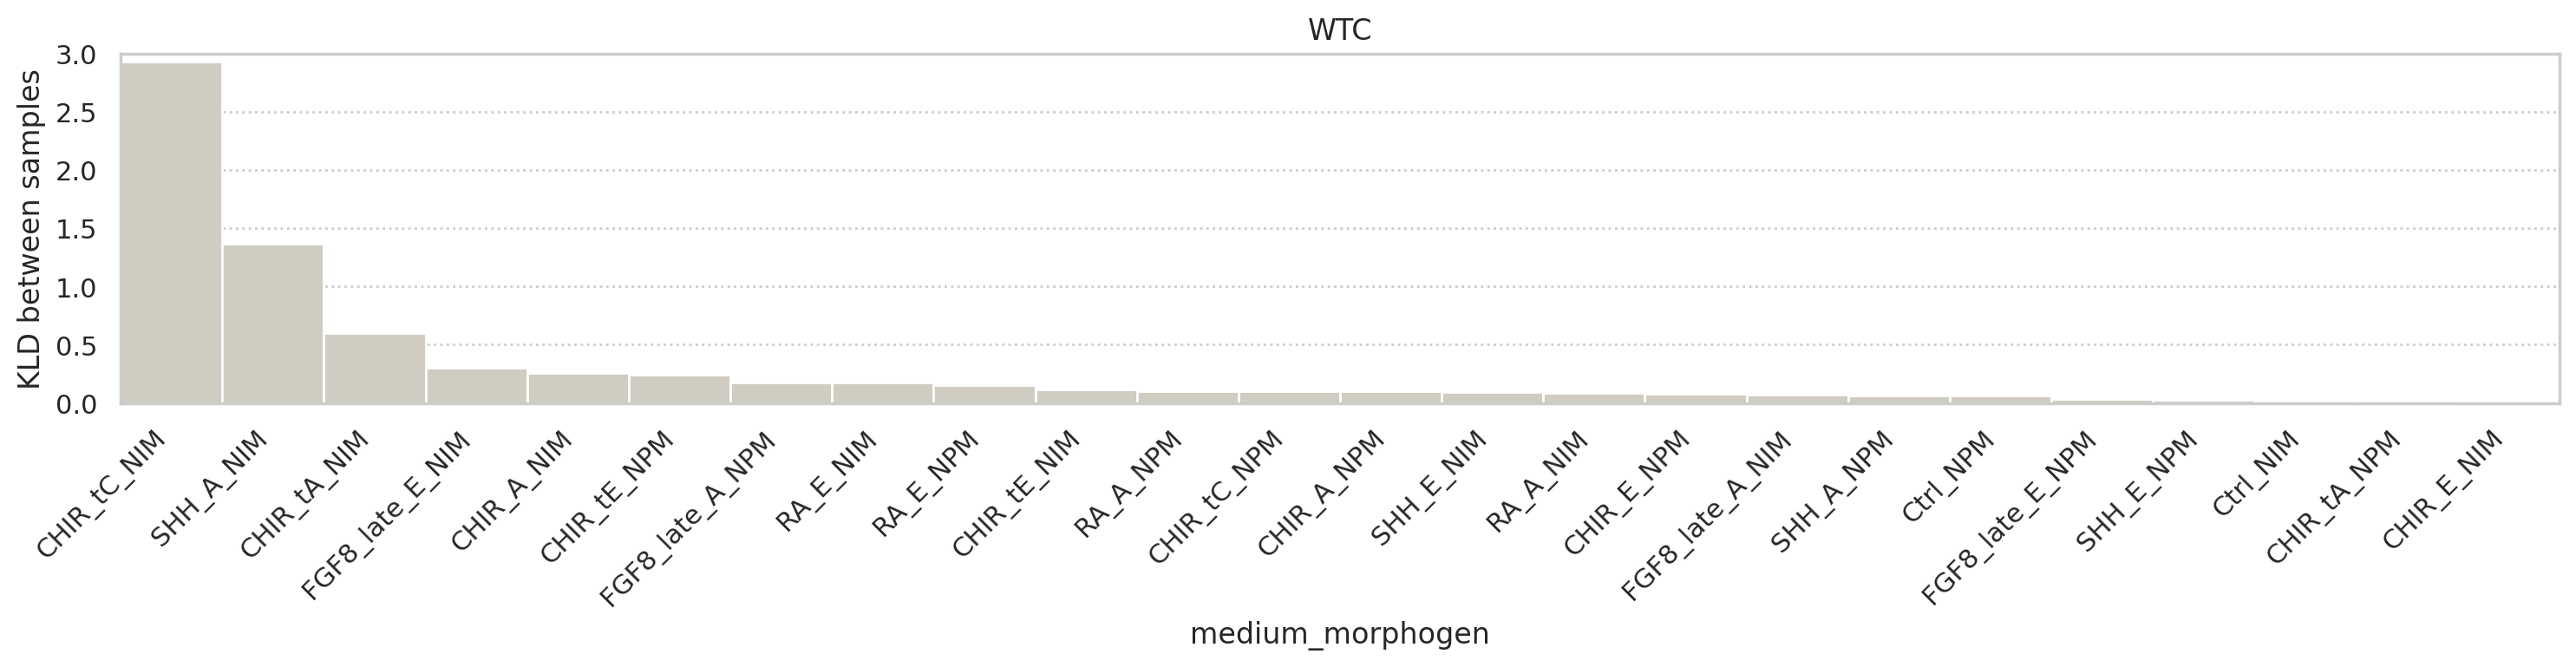

In [121]:
celltable = adata.obs[adata.obs.cell_line == 'WTC']
plot_KLD(celltable, 'WTC', path_fig+'WTC_KLD_batches.pdf')

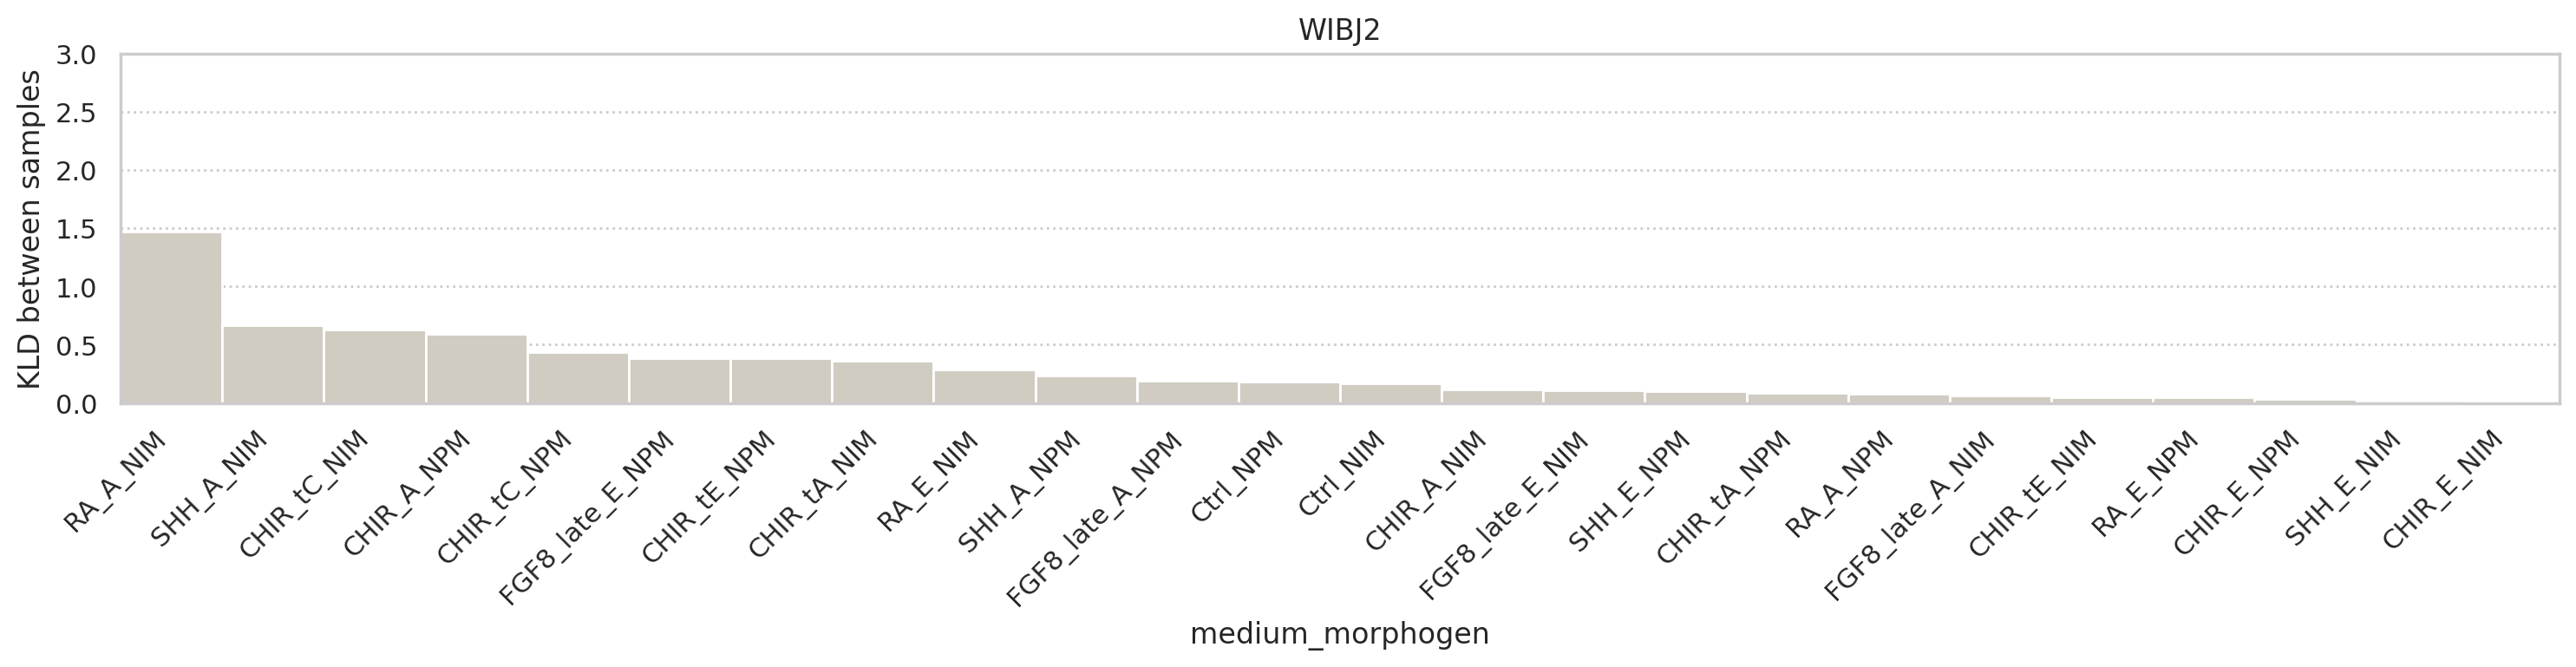

In [122]:
celltable = adata.obs[adata.obs.cell_line == 'WIBJ2']
plot_KLD(celltable, 'WIBJ2', path_fig+'WIBJ2_KLD_batches.pdf')

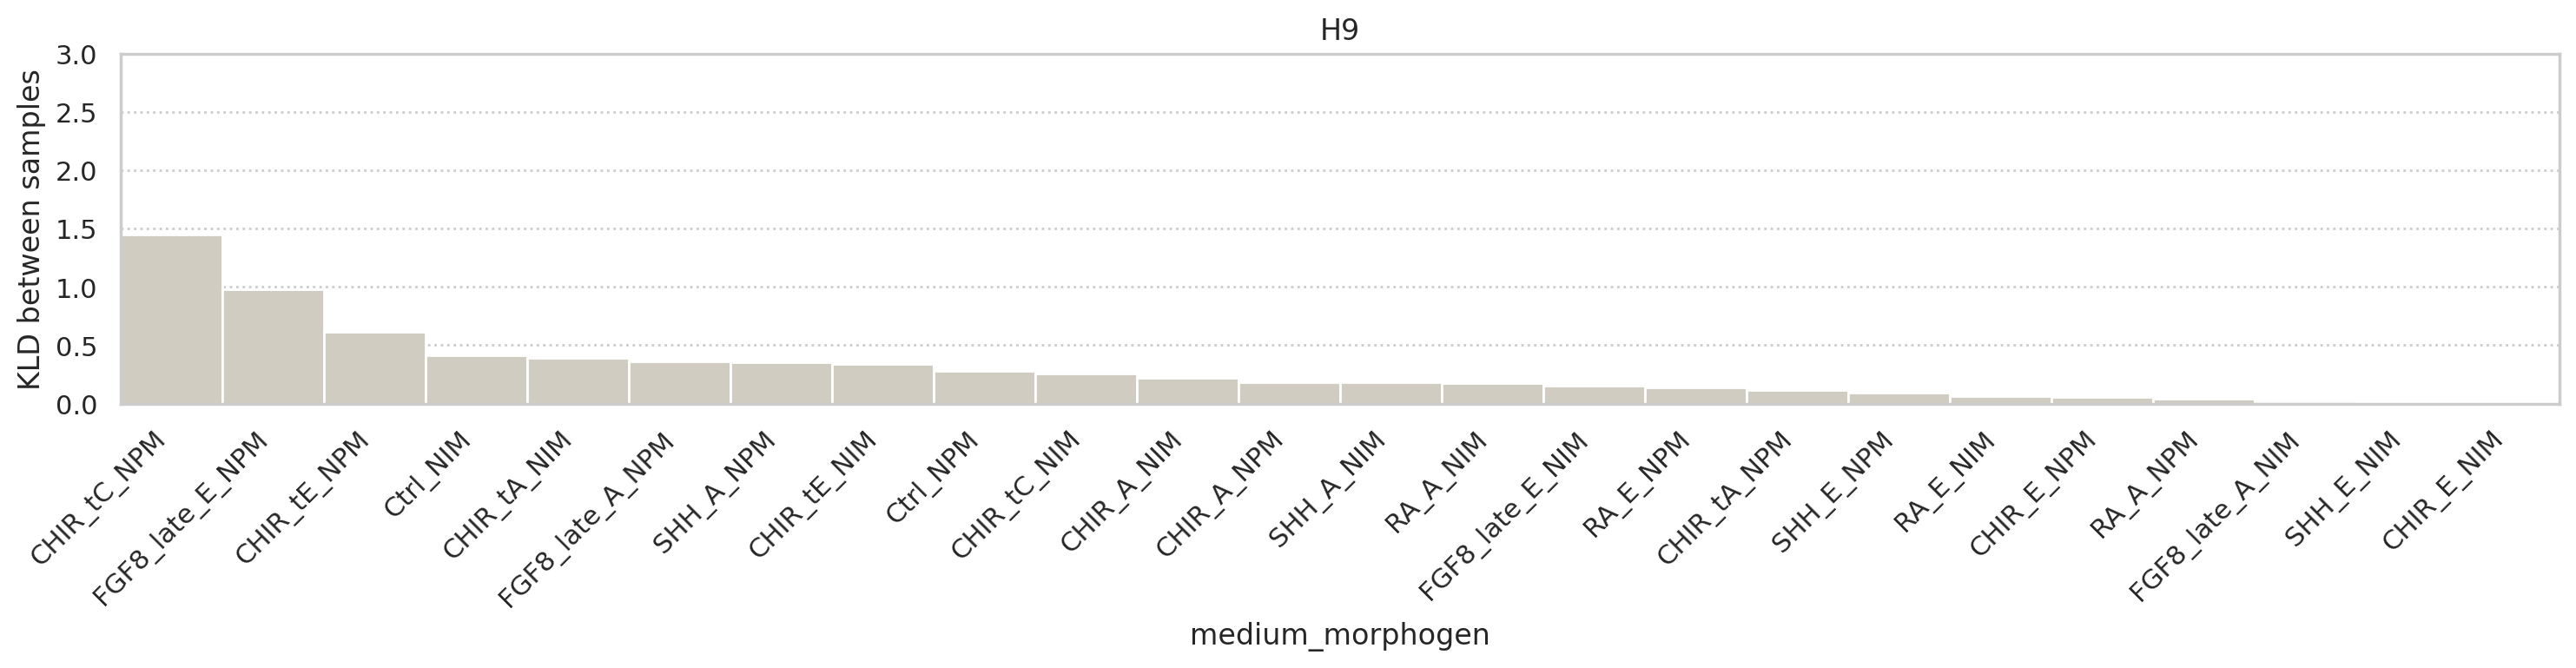

In [123]:
celltable = adata.obs[adata.obs.cell_line == 'H9']
plot_KLD(celltable, 'H9', path_fig+'H9_KLD_batches.pdf')

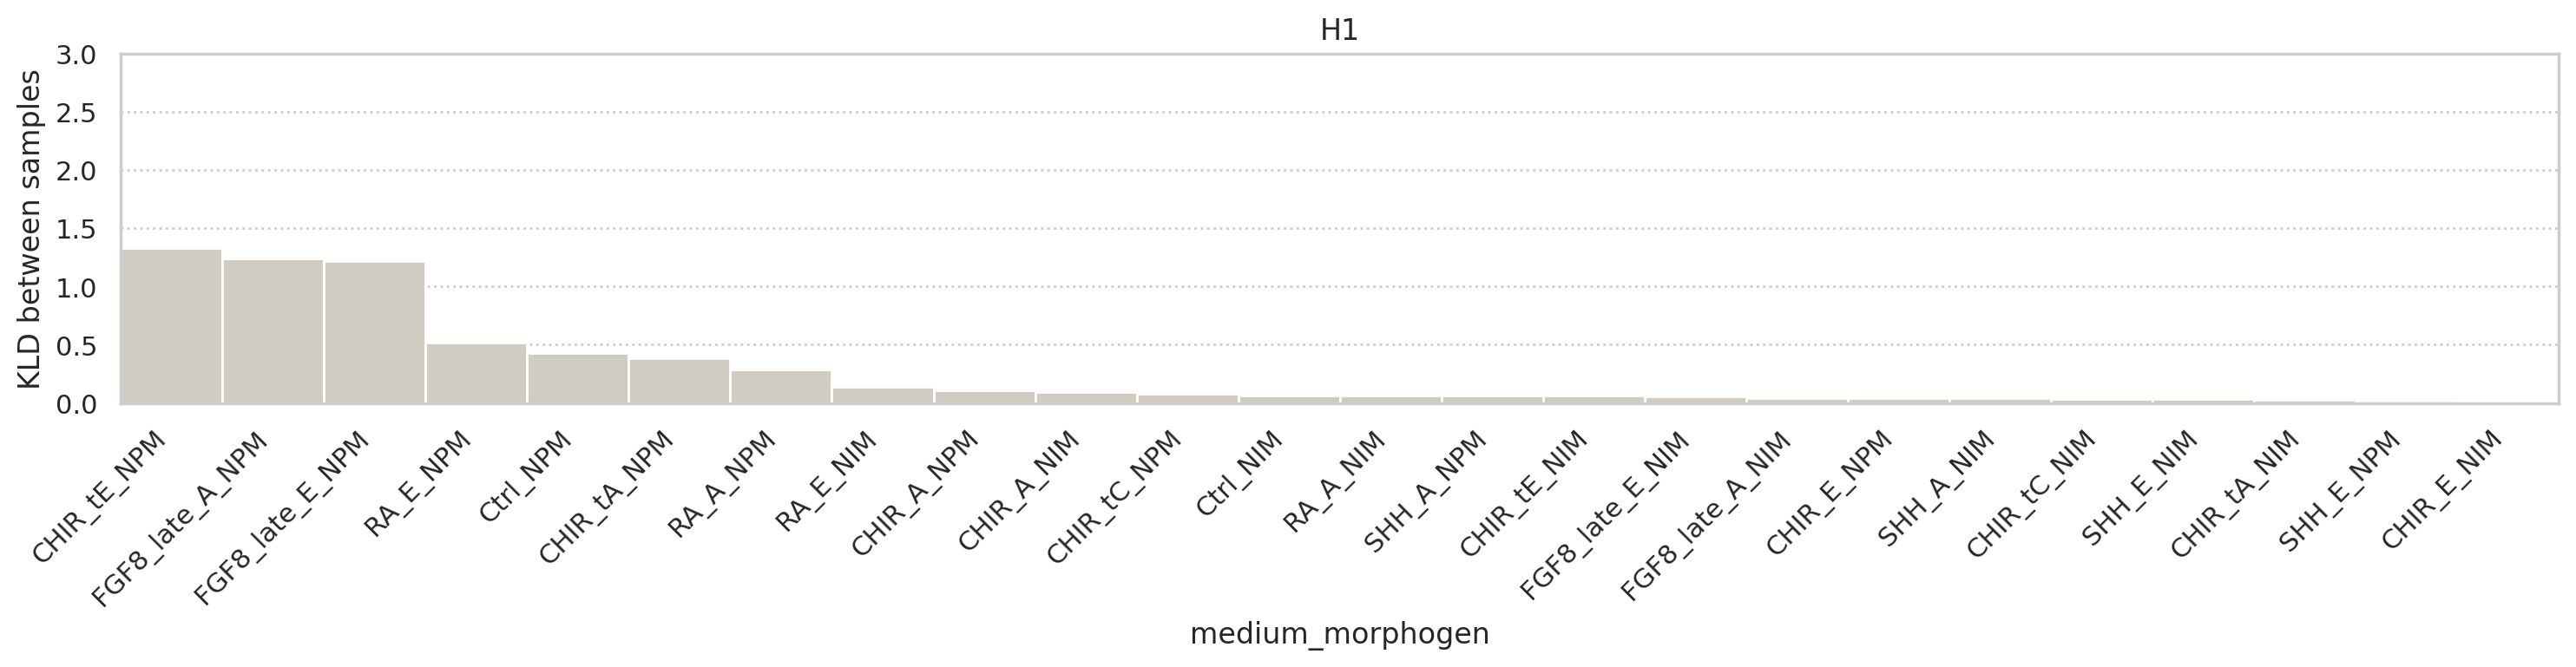

In [124]:
celltable = adata.obs[adata.obs.cell_line == 'H1']
plot_KLD(celltable, 'H1', path_fig+'H1_KLD_batches.pdf')

In [116]:
def return_KLD(celltable, columns_split):
    conditions_list = celltable[columns_split].unique().tolist()

    result_big = pd.DataFrame()
    for elem in conditions_list:
        celltable_small = celltable[celltable[columns_split]==elem] #subset to the condition
        metadf = celltable_small[['medium_morphogen', 'line_morphogen_batch']].drop_duplicates()
        dfc = pd.crosstab(celltable_small['line_morphogen_batch'], celltable_small.fullname_v5, normalize='index').mul(100).round(100)
        dfc['line_morphogen_batch'] = dfc.index.copy()
        dfc.index.name = None
        
        
        dfc = pd.merge(dfc, metadf, how = 'left', on = 'line_morphogen_batch')
        #print(dfc)
        import  itertools 
        from scipy.stats import entropy
        result = pd.DataFrame()
        for cond in dfc.medium_morphogen.unique():
            sampledf = dfc[dfc.medium_morphogen == cond].copy()
            
            sampledf = sampledf.drop(['line_morphogen_batch', 'medium_morphogen'],axis=1)
            sampledf = sampledf.reset_index(drop=True)
            sampledf = sampledf.T
            #print(sampledf)
            
        
            if sampledf.shape[1] >1:
                combin = list(itertools.combinations(sampledf.columns.tolist(), 2))
                reslist = [entropy(sampledf.loc[:,c].iloc[:,0]+0.00000001, sampledf.loc[:,c].iloc[:,1]+0.00000001 ) for c in combin]  #+ small number to fill 0
                resdf = pd.DataFrame({'medium_morphogen': [cond for i in range(len(reslist))], 'KLD' :reslist})
                result = pd.concat([result, resdf], axis =0)
        result[columns_split] = [elem for i in range(len(result))]
            #result_big.append(result)
        result_big = pd.concat([result_big, result], ignore_index=True)

    return result_big

        

In [175]:

celltable = adata.obs[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])].copy()
line_result = return_KLD(celltable, 'medium')
line_result['morphogen'] = line_result.medium_morphogen.str.split('_',n=1).str[0]
line_result.head()


medium_morphogen       KLD medium morphogen
0       CHIR_A_NIM  0.093148    NIM      CHIR
1       CHIR_A_NIM  1.237263    NIM      CHIR
2       CHIR_A_NIM  0.914284    NIM      CHIR
3       CHIR_A_NIM  0.479173    NIM      CHIR
4       CHIR_A_NIM  0.241660    NIM      CHIR

4.446177637927956


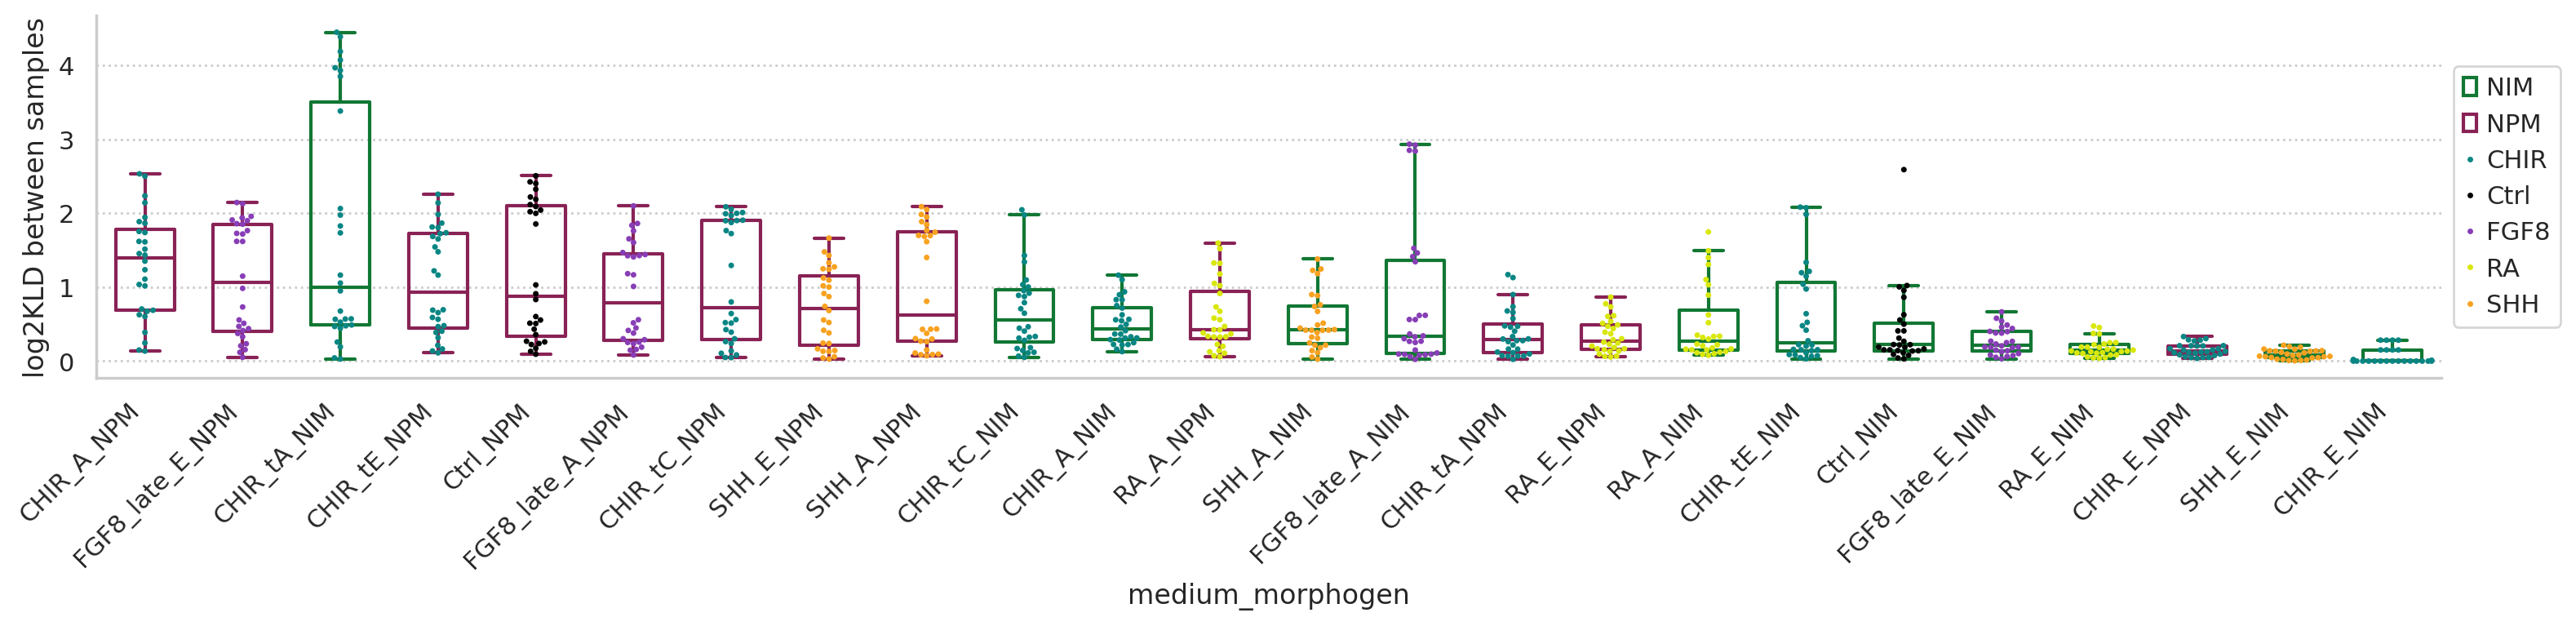

In [183]:
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})
line_result['log2KLD'] = np.log2(line_result['KLD']+1)
print(max(line_result['log2KLD']))
my_order = line_result.groupby(by=["medium_morphogen"])["log2KLD"].median().sort_values().iloc[::-1].index



plot = sns.boxplot(data=line_result, y='log2KLD', x = 'medium_morphogen',  order=my_order, 
 hue='medium',
                width=0.6,fill=False, showfliers = False, palette=cs.Medium)

sns.swarmplot(data=line_result, x="medium_morphogen", y="log2KLD", hue='morphogen', palette = cs.cols_SingleMorph,s=2.5)
    
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
plt.ylabel('log2KLD between samples')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'KLD_log2_morphogen_medium_color.pdf', dpi=300)

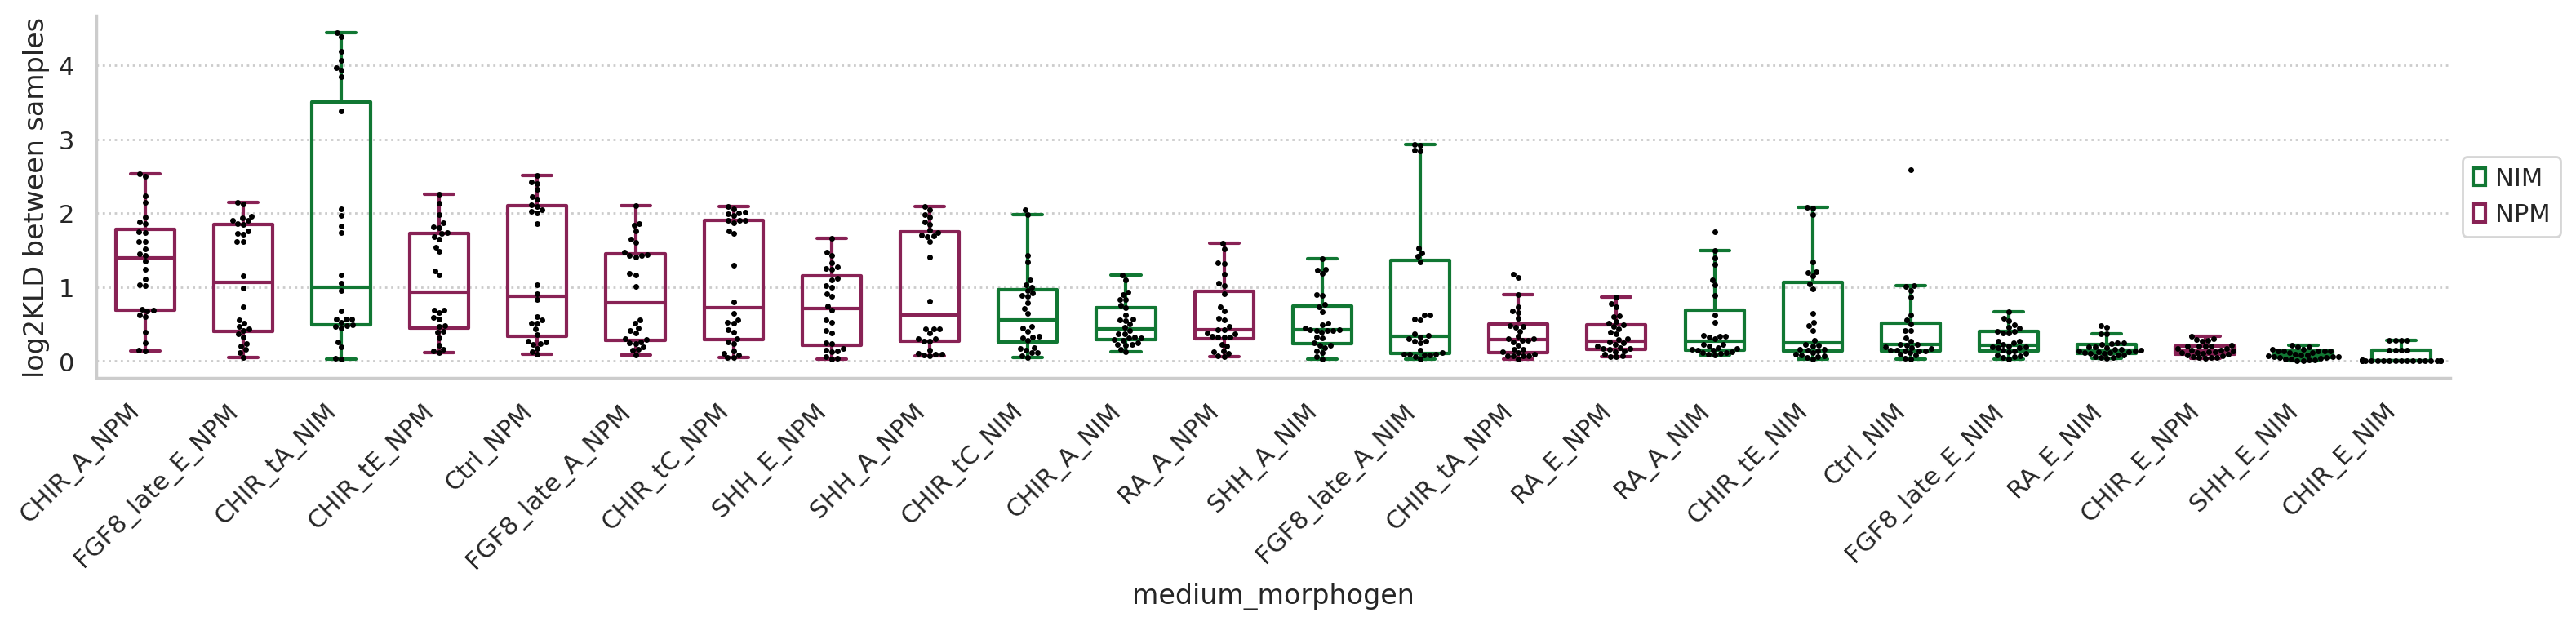

In [181]:
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})
line_result['log2KLD'] = np.log2(line_result['KLD']+1)
my_order = line_result.groupby(by=["medium_morphogen"])["log2KLD"].median().sort_values().iloc[::-1].index


plot = sns.boxplot(data=line_result, y='log2KLD', x = 'medium_morphogen',  order=my_order, 
                 hue='medium',
                width=0.6,fill=False, showfliers = False, palette=cs.Medium)

sns.swarmplot(data=line_result, x="medium_morphogen", y="log2KLD",color='black',s=2.5)
    
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
plt.ylabel('log2KLD between samples')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'KLD_log2_morphogen_medium_black.pdf', dpi=300)

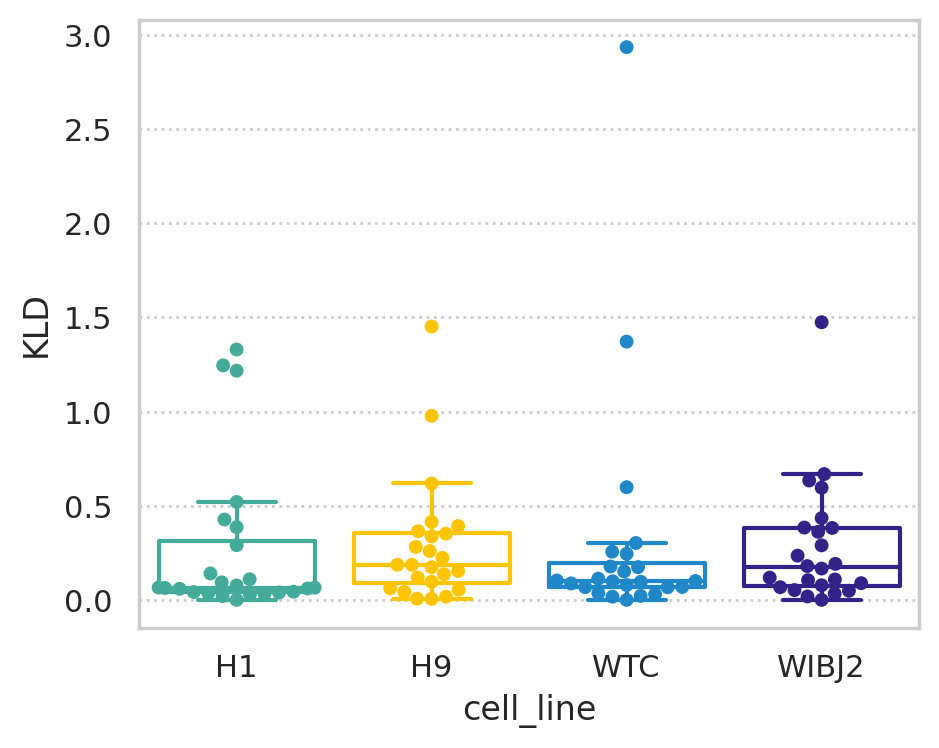

In [143]:
celltable = adata.obs[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])]
line_result = return_KLD(celltable, 'cell_line')
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})
sns.swarmplot(data=line_result, x="cell_line", y="KLD", hue="cell_line", palette = cs.cols_Cell_Line)
sns.boxplot(data=line_result, x="cell_line", y="KLD", hue="cell_line", palette = cs.cols_Cell_Line,fill=False, showfliers = False)
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'KLD_Cell_line_reproducibility.pdf', dpi=300)
plt.show()

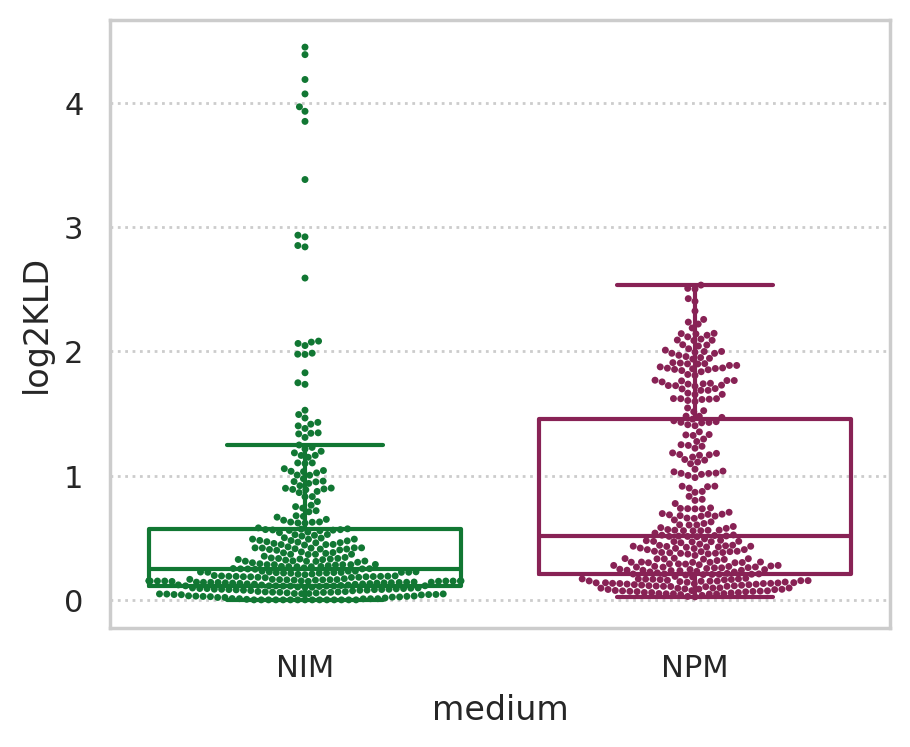

In [145]:
celltable = adata.obs[adata.obs.cell_line.isin(['H1', 'H9', 'WTC', 'WIBJ2'])].copy()
line_result = return_KLD(celltable, 'medium')
line_result['log2KLD'] = np.log2(line_result['KLD']+1)
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})

sns.swarmplot(data=line_result, x="medium", y="log2KLD", hue="medium", palette = cs.Medium,s=2.5)
sns.boxplot(data=line_result, x="medium", y="log2KLD", hue="medium", palette = cs.Medium,fill=False, showfliers = False)
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'log2KLD_Medium_reproducibility.pdf', dpi=300)
plt.show()

# Check MMD/edist

In [153]:
df = pd.read_csv(Path(path_data)/'e_distance_general.tsv',
                 sep='\t')
df.head()

cell_condition_batch  H1_Ctrl_NIM_B1  H9_Ctrl_NIM_B1  H1_SHH_A_NIM_B1  \
0       H1_Ctrl_NIM_B1        0.000000        1.615203         0.886308   
1       H9_Ctrl_NIM_B1        1.615203        0.000000         0.856105   
2      H1_SHH_A_NIM_B1        0.886308        0.856105         0.000000   
3      H9_SHH_A_NIM_B1        2.544671        0.363201         0.960267   
4      H9_SHH_E_NIM_B1        3.967877        4.322375         4.387863   

   H9_SHH_A_NIM_B1  H9_SHH_E_NIM_B1  H1_SHH_E_NIM_B1  H9_RA_A_NIM_B1  \
0         2.544671         3.967877         4.254074        3.926095   
1         0.363201         4.322375         4.713836        1.951450   
2         0.960267         4.387863         4.817040        3.880188   
3         0.000000         4.742834         5.173191        2.670267   
4         4.742834         0.000000         0.118808        5.459194   

   H1_RA_A_NIM_B1  H1_RA_E_NIM_B1  ...  WTC_FGF8_late_A_NPM_B2  \
0        2.465256        5.161330  ...                6.743362   
1        1.870381        3.440913  ...                5.010629   
2        3.149394        5.664268  ...                6.630782   
3        2.879951        4.476733  ...                5.172529   
4        4.522451        5.302471  ...                3.886604   

   WIBJ2_FGF8_late_A_NPM_B2  WTC_FGF8_late_E_NPM_B2  WIBJ2_FGF8_late_E_NPM_B2  \
0                  3.843894                7.435841                  3.228746   
1                  5.111327                5.210270                  3.736454   
2                  5.429206                6.754627                  4.099605   
3                  6.236069                5.070704                  4.545961   
4                  2.383884                4.835304                  2.207878   

   WIBJ2_CHIR_tA_NPM_B2  WTC_CHIR_tA_NPM_B2  WTC_CHIR_tC_NPM_B2  \
0              7.959806            8.916448            7.227197   
1              7.337176            8.249469            5.231150   
2              8.772999            9.767269            7.003771   
3              7.872343            8.744476            5.294488   
4              3.137199            3.619499            4.046164   

   WIBJ2_CHIR_tC_NPM_B2  WIBJ2_CHIR_tE_NPM_B2  WTC_CHIR_tE_NPM_B2  
0              3.278447              4.641508            7.573579  
1              4.002885              6.499528            5.464875  
2              4.463947              6.823435            7.142498  
3              4.850221              7.855366            5.382436  
4              2.544761              2.894712            4.415822  

[5 rows x 193 columns]

In [154]:
## cell line level
melted = pd.melt(df, id_vars=['cell_condition_batch'], var_name='Column', value_name='Value')
unique_df = melted[melted['cell_condition_batch'] < melted['Column']].copy()
unique_df['Condition_1'] = unique_df.cell_condition_batch.str[:-3]
unique_df['Condition_2'] = unique_df.Column.str[:-3]
unique_df['Batch1'] = unique_df.cell_condition_batch.str[-2:]
unique_df['Batch2'] = unique_df.Column.str[-2:]
unique_df = unique_df[unique_df.Condition_1==unique_df.Condition_2] # to compare batches
unique_df['Medium'] = unique_df.Condition_1.str[-3:]
unique_df['Morphogen'] = unique_df.Condition_1.str.split('_',n=1).str[1]
unique_df

cell_condition_batch                Column     Value  \
18432        H1_Ctrl_NIM_B1        H1_Ctrl_NIM_B2  0.094533   
18625        H9_Ctrl_NIM_B1        H9_Ctrl_NIM_B2  0.557812   
18818       H1_SHH_A_NIM_B1       H1_SHH_A_NIM_B2  0.066210   
19011       H9_SHH_A_NIM_B1       H9_SHH_A_NIM_B2  0.076064   
19205       H1_SHH_E_NIM_B1       H1_SHH_E_NIM_B2  0.085783   
...                     ...                   ...       ...   
35995    WTC_CHIR_tA_NPM_B1    WTC_CHIR_tA_NPM_B2  0.261079   
36189    WTC_CHIR_tC_NPM_B1    WTC_CHIR_tC_NPM_B2  0.145432   
36380  WIBJ2_CHIR_tC_NPM_B1  WIBJ2_CHIR_tC_NPM_B2  1.137413   
36575  WIBJ2_CHIR_tE_NPM_B1  WIBJ2_CHIR_tE_NPM_B2  0.458977   
36766    WTC_CHIR_tE_NPM_B1    WTC_CHIR_tE_NPM_B2  0.306632   

             Condition_1        Condition_2 Batch1 Batch2 Medium    Morphogen  
18432        H1_Ctrl_NIM        H1_Ctrl_NIM     B1     B2    NIM     Ctrl_NIM  
18625        H9_Ctrl_NIM        H9_Ctrl_NIM     B1     B2    NIM     Ctrl_NIM  
18818       H1_SHH_A_NIM       H1_SHH_A_NIM     B1     B2    NIM    SHH_A_NIM  
19011       H9_SHH_A_NIM       H9_SHH_A_NIM     B1     B2    NIM    SHH_A_NIM  
19205       H1_SHH_E_NIM       H1_SHH_E_NIM     B1     B2    NIM    SHH_E_NIM  
...                  ...                ...    ...    ...    ...          ...  
35995    WTC_CHIR_tA_NPM    WTC_CHIR_tA_NPM     B1     B2    NPM  CHIR_tA_NPM  
36189    WTC_CHIR_tC_NPM    WTC_CHIR_tC_NPM     B1     B2    NPM  CHIR_tC_NPM  
36380  WIBJ2_CHIR_tC_NPM  WIBJ2_CHIR_tC_NPM     B1     B2    NPM  CHIR_tC_NPM  
36575  WIBJ2_CHIR_tE_NPM  WIBJ2_CHIR_tE_NPM     B1     B2    NPM  CHIR_tE_NPM  
36766    WTC_CHIR_tE_NPM    WTC_CHIR_tE_NPM     B1     B2    NPM  CHIR_tE_NPM  

[96 rows x 9 columns]

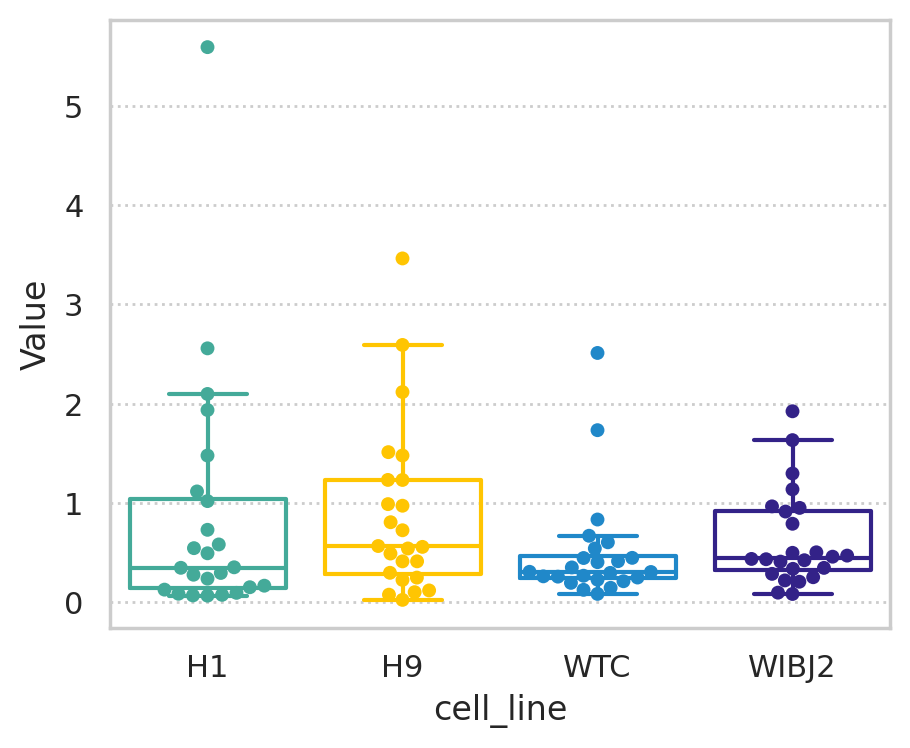

In [156]:
unique_df['cell_line'] = unique_df.Condition_1.str.split('_',n=1).str[0]

sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})
sns.swarmplot(data=unique_df, x="cell_line", y="Value", hue="cell_line", palette = cs.cols_Cell_Line,
             order=['H1', 'H9', 'WTC', 'WIBJ2'])
sns.boxplot(data=unique_df, x="cell_line", y="Value", hue="cell_line", palette = cs.cols_Cell_Line,fill=False, showfliers = False)
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'Cell_line_reproducibility_E_dist.pdf', dpi=300)
plt.show()

In [157]:
### medium condition-wise

melted = pd.melt(df, id_vars=['cell_condition_batch'], var_name='Column', value_name='Value')
unique_df = melted[melted['cell_condition_batch'] < melted['Column']].copy()
unique_df['Condition_1'] = unique_df.cell_condition_batch.str[:-3]
unique_df['Condition_2'] = unique_df.Column.str[:-3]
unique_df['Morphogen1'] = unique_df.Condition_1.str.split('_',n=1).str[1]
unique_df['Morphogen2'] = unique_df.Condition_2.str.split('_',n=1).str[1]
unique_df = unique_df[unique_df.Morphogen1==unique_df.Morphogen2] # to compare withing one morphogen treatment
unique_df['Medium'] = unique_df.Condition_1.str[-3:]
unique_df

cell_condition_batch              Column     Value        Condition_1  \
192          H1_Ctrl_NIM_B1      H9_Ctrl_NIM_B1  1.615203        H1_Ctrl_NIM   
288          H1_Ctrl_NIM_B2      H9_Ctrl_NIM_B1  2.059604        H1_Ctrl_NIM   
578         H1_SHH_A_NIM_B1     H9_SHH_A_NIM_B1  0.960267       H1_SHH_A_NIM   
674         H1_SHH_A_NIM_B2     H9_SHH_A_NIM_B1  0.807866       H1_SHH_A_NIM   
773         H1_SHH_E_NIM_B1     H9_SHH_E_NIM_B1  0.118808       H1_SHH_E_NIM   
...                     ...                 ...       ...                ...   
36766    WTC_CHIR_tE_NPM_B1  WTC_CHIR_tE_NPM_B2  0.306632    WTC_CHIR_tE_NPM   
36767  WIBJ2_CHIR_tE_NPM_B1  WTC_CHIR_tE_NPM_B2  5.393308  WIBJ2_CHIR_tE_NPM   
36850     H1_CHIR_tE_NPM_B2  WTC_CHIR_tE_NPM_B2  7.954767     H1_CHIR_tE_NPM   
36851     H9_CHIR_tE_NPM_B2  WTC_CHIR_tE_NPM_B2  7.621223     H9_CHIR_tE_NPM   
36862  WIBJ2_CHIR_tE_NPM_B2  WTC_CHIR_tE_NPM_B2  4.610573  WIBJ2_CHIR_tE_NPM   

           Condition_2   Morphogen1   Morphogen2 Medium  
192        H9_Ctrl_NIM     Ctrl_NIM     Ctrl_NIM    NIM  
288        H9_Ctrl_NIM     Ctrl_NIM     Ctrl_NIM    NIM  
578       H9_SHH_A_NIM    SHH_A_NIM    SHH_A_NIM    NIM  
674       H9_SHH_A_NIM    SHH_A_NIM    SHH_A_NIM    NIM  
773       H9_SHH_E_NIM    SHH_E_NIM    SHH_E_NIM    NIM  
...                ...          ...          ...    ...  
36766  WTC_CHIR_tE_NPM  CHIR_tE_NPM  CHIR_tE_NPM    NPM  
36767  WTC_CHIR_tE_NPM  CHIR_tE_NPM  CHIR_tE_NPM    NPM  
36850  WTC_CHIR_tE_NPM  CHIR_tE_NPM  CHIR_tE_NPM    NPM  
36851  WTC_CHIR_tE_NPM  CHIR_tE_NPM  CHIR_tE_NPM    NPM  
36862  WTC_CHIR_tE_NPM  CHIR_tE_NPM  CHIR_tE_NPM    NPM  

[672 rows x 8 columns]

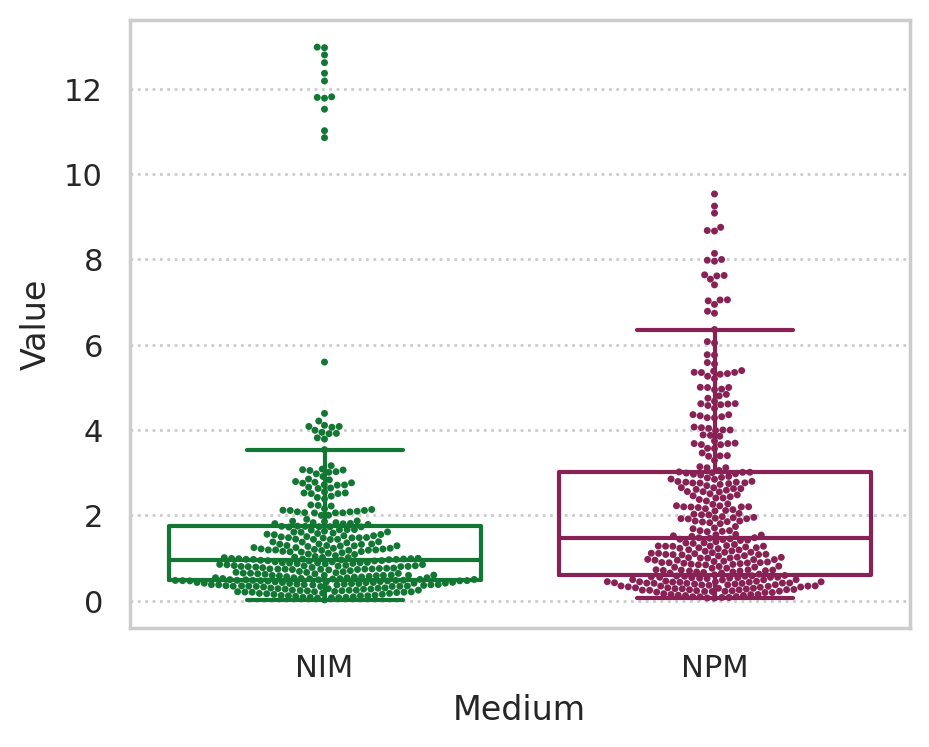

In [159]:

sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", { "grid.linestyle": ":"})

sns.swarmplot(data=unique_df, x="Medium", y="Value", hue="Medium", palette = cs.Medium,s=2.5)
sns.boxplot(data=unique_df, x="Medium", y="Value", hue="Medium", palette = cs.Medium,fill=False, showfliers = False)
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'Medium_reproducibility_E_dist.pdf', dpi=300)
plt.show()

# NPC/neurons

In [20]:
adata.obs['line_morphogen'] = adata.obs.cell_line.astype(str) + '_' + adata.obs.medium_morphogen.astype(str) 
adata.obs.fullname_v5.unique().tolist()

['Telencephalic Progenitors',
 'Retinal Progenitors',
 'Hindbrain Progenitors',
 'CNS Neurons',
 'Non-neurectodermal tissues',
 'Hypothalamic Progenitors',
 'Neural Crest',
 'Neuroectoderm/Neuroepithelium',
 'Spinal Cord Progenitors',
 'Cortical Hem/Diencephalon',
 'Midbrain Progenitors',
 'PNS Neurons',
 'Floor Plate']

In [25]:

simple_cell = {
     'Telencephalic Progenitors':'NPC',
     'Retinal Progenitors':'NPC',
     'Hindbrain Progenitors':'NPC',
     'CNS Neurons':'Neurons',
     'Non-neurectodermal tissues':'off',
     'Hypothalamic Progenitors':'NPC',
     'Neural Crest':'off',
     'Neuroectoderm/Neuroepithelium':'NPC',
     'Spinal Cord Progenitors':'NPC',
     'Cortical Hem/Diencephalon':'NPC',
     'Midbrain Progenitors':'NPC',
     'PNS Neurons':'Neurons',
     'Floor Plate':'NPC'
    }



adata.obs['simple_cells'] = adata.obs['fullname_v5'].map(simple_cell)
dfc = pd.crosstab(adata.obs['line_morphogen'], adata.obs['simple_cells'], normalize='index').mul(100).round(100)
dfc['line_morphogen'] = dfc.index.copy()

dfc = pd.melt(dfc,id_vars = ['line_morphogen'], value_vars = ['NPC', 'Neurons', 'off'])
dfc['medium'] = dfc['line_morphogen'].str[-3:]
dfc



line_morphogen simple_cells      value medium
0     H1_CHIR_A_NIM          NPC  90.068027    NIM
1     H1_CHIR_A_NPM          NPC  75.747801    NPM
2     H1_CHIR_E_NIM          NPC   0.000000    NIM
3     H1_CHIR_E_NPM          NPC  72.579001    NPM
4    H1_CHIR_tA_NIM          NPC   3.050847    NIM
..              ...          ...        ...    ...
283    WTC_RA_E_NPM          off   2.168125    NPM
284   WTC_SHH_A_NIM          off   9.338521    NIM
285   WTC_SHH_A_NPM          off   1.779359    NPM
286   WTC_SHH_E_NIM          off   2.521901    NIM
287   WTC_SHH_E_NPM          off   0.855049    NPM

[288 rows x 4 columns]

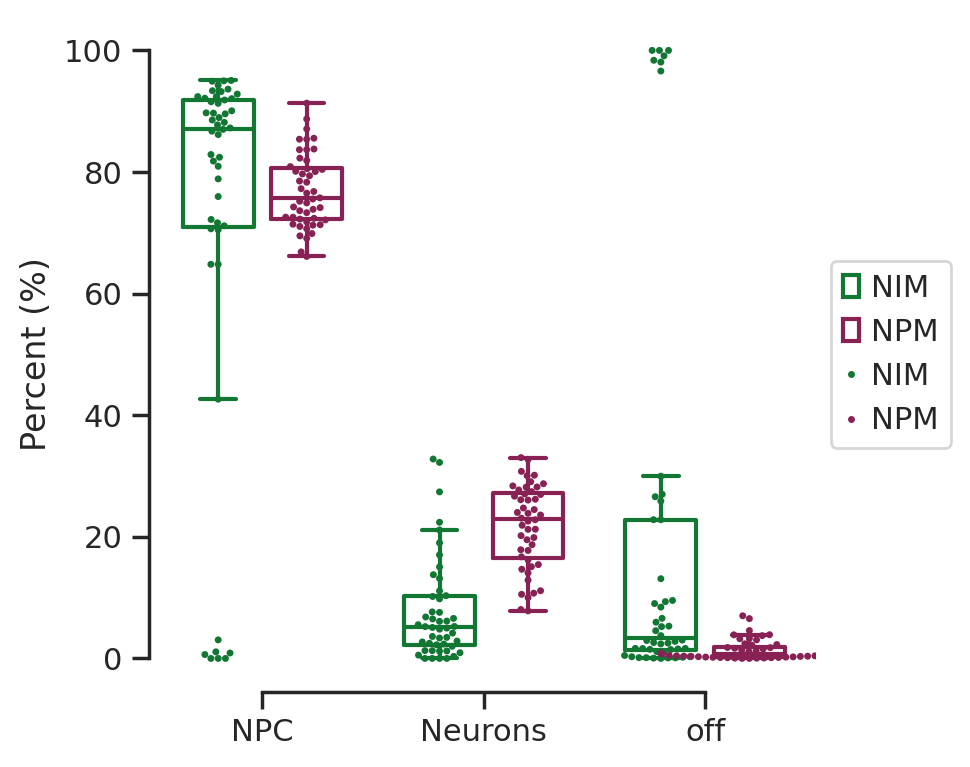

In [91]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
sns.set_style('ticks')
sns.boxplot(data=dfc, x="simple_cells", y="value", hue="medium", 
              palette = cs.Medium, fill=False, showfliers = False, dodge=True, gap=.2)


sns.swarmplot(data=dfc, x="simple_cells", y="value", hue="medium", palette = cs.Medium,s=2.5, dodge=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(offset=1, trim=True, bottom=False)
plt.xlabel('')
plt.tight_layout()

plt.ylabel('Percent (%)')
plt.rcParams['pdf.fonttype'] = 42 
plt.savefig(path_fig+'5.pdf', dpi=300)

plt.show()

### Fisher test

In [17]:
dfc = adata.obs[['line_morphogen', 'simple_cells']]
dfc['medium'] = dfc['line_morphogen'].str[-3:]
dfc

line_morphogen simple_cells medium
01_01_21__s1        H1_Ctrl_NIM          NPC    NIM
01_01_26__s1        H1_Ctrl_NIM          NPC    NIM
01_01_31__s1        H1_Ctrl_NIM          NPC    NIM
01_01_38__s1        H9_Ctrl_NIM          NPC    NIM
01_01_41__s1        H9_Ctrl_NIM          NPC    NIM
...                         ...          ...    ...
96_92_91__s4    WTC_CHIR_tE_NPM          NPC    NPM
96_93_67__s4    WTC_CHIR_tE_NPM          NPC    NPM
96_94_19__s4  WIBJ2_CHIR_tE_NPM          NPC    NPM
96_94_34__s4    WTC_CHIR_tE_NPM      Neurons    NPM
96_94_87__s4    WTC_CHIR_tE_NPM          NPC    NPM

[209902 rows x 3 columns]

In [18]:
dfc['line_morphogen'] = pd.Categorical(dfc['line_morphogen'])
dfc['samples'] = pd.factorize(dfc['line_morphogen'])[0] + 1
dfc.head()

line_morphogen simple_cells medium  samples
01_01_21__s1    H1_Ctrl_NIM          NPC    NIM        1
01_01_26__s1    H1_Ctrl_NIM          NPC    NIM        1
01_01_31__s1    H1_Ctrl_NIM          NPC    NIM        1
01_01_38__s1    H9_Ctrl_NIM          NPC    NIM        2
01_01_41__s1    H9_Ctrl_NIM          NPC    NIM        2

In [19]:
dfc.to_csv(path_fig+'for_enrichment.tsv', sep='\t', index = False)